In [1]:
import pandas as pd
import warnings 
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

请根据附件3土壤湿度数据、附件4土壤蒸发数据以及附件8中降水等数据，

建立模型对保持目前放牧策略不变情况下对2022年、2023年不同深度土壤湿度进行预测，

并完成下表。

In [2]:
temp2=pd.read_excel('附件3、土壤湿度2022—2012年.xls')
temp2.head()

,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2)
0,1,2022,115.375,44.125,12.45,52.14,93.45,164.48
1,2,2022,115.375,44.125,12.10,52.14,93.45,164.48
2,3,2022,115.375,44.125,14.96,52.13,93.44,164.48
3,1,2021,115.375,44.125,15.17,50.40,82.44,165.92
4,2,2021,115.375,44.125,13.93,50.40,82.44,165.92


In [3]:
temp3=pd.read_excel('附件4、土壤蒸发量2012—2022年.xls')
temp3.head()

,月份,年份,经度(lon),纬度(lat),土壤蒸发量(W/m2),土壤蒸发量(mm)
0,1,2022,115.375,44.125,0.41,0.44
1,2,2022,115.375,44.125,0.28,0.27
2,3,2022,115.375,44.125,5.58,5.98
3,1,2021,115.375,44.125,1.05,1.13
4,2,2021,115.375,44.125,1.58,1.53


In [4]:
temp4=pd.read_excel('附件6、植被指数-NDVI2012-2022年.xls')
temp4.head()

,月份,年份,经度(lon),纬度(lat),植被指数(NDVI)
0,1,2022,115.375,44.125,0.010
1,2,2022,115.375,44.125,0.010
2,3,2022,115.375,44.125,0.187
3,4,2022,115.375,44.125,0.191
4,1,2021,115.375,44.125,-0.002


In [5]:
temp5=pd.read_excel('附件9、径流量2012-2022年.xlsx')
temp5.head()

,月份,年份,经度(lon),纬度(lat),径流量(m3/s),径流量(m3)
0,1,2022,115.375,44.125,0.160786,430650.0
1,2,2022,115.375,44.125,0.116071,280800.0
2,3,2022,115.375,44.125,0.825605,2211300.0
3,1,2021,115.375,44.125,0.066532,178200.0
4,2,2021,115.375,44.125,0.033482,81000.0


In [6]:
data=pd.merge(temp2,temp3)
data.head()

,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm)
0,1,2022,115.375,44.125,12.45,52.14,93.45,164.48,0.41,0.44
1,2,2022,115.375,44.125,12.10,52.14,93.45,164.48,0.28,0.27
2,3,2022,115.375,44.125,14.96,52.13,93.44,164.48,5.58,5.98
3,1,2021,115.375,44.125,15.17,50.40,82.44,165.92,1.05,1.13
4,2,2021,115.375,44.125,13.93,50.40,82.44,165.92,1.58,1.53


In [7]:
data

,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm)
0,1,2022,115.375,44.125,12.45,52.14,93.45,164.48,0.41,0.44
1,2,2022,115.375,44.125,12.10,52.14,93.45,164.48,0.28,0.27
2,3,2022,115.375,44.125,14.96,52.13,93.44,164.48,5.58,5.98
3,1,2021,115.375,44.125,15.17,50.40,82.44,165.92,1.05,1.13
4,2,2021,115.375,44.125,13.93,50.40,82.44,165.92,1.58,1.53
...,...,...,...,...,...,...,...,...,...,...
118,8,2012,115.375,44.125,15.76,44.94,61.25,168.44,13.32,14.27
119,9,2012,115.375,44.125,17.12,45.67,55.29,168.38,12.88,13.36
120,10,2012,115.375,44.125,15.04,42.49,54.69,168.33,7.59,8.13
121,11,2012,115.375,44.125,14.79,42.71,55.02,168.32,0.88,0.92


In [8]:
data=pd.merge(data,temp4)
data=pd.merge(data,temp5)

In [9]:
data

,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),植被指数(NDVI),径流量(m3/s),径流量(m3)
0,1,2022,115.375,44.125,12.45,52.14,93.45,164.48,0.41,0.44,0.010,0.160786,430650.00
1,2,2022,115.375,44.125,12.10,52.14,93.45,164.48,0.28,0.27,0.010,0.116071,280800.00
2,3,2022,115.375,44.125,14.96,52.13,93.44,164.48,5.58,5.98,0.187,0.825605,2211300.00
3,1,2021,115.375,44.125,15.17,50.40,82.44,165.92,1.05,1.13,-0.002,0.066532,178200.00
4,2,2021,115.375,44.125,13.93,50.40,82.44,165.92,1.58,1.53,0.002,0.033482,81000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,8,2012,115.375,44.125,15.76,44.94,61.25,168.44,13.32,14.27,0.597,0.621472,1664550.10
119,9,2012,115.375,44.125,17.12,45.67,55.29,168.38,12.88,13.36,0.475,0.444010,1150875.00
120,10,2012,115.375,44.125,15.04,42.49,54.69,168.33,7.59,8.13,0.282,0.361643,968624.94
121,11,2012,115.375,44.125,14.79,42.71,55.02,168.32,0.88,0.92,0.176,0.290104,751950.00


In [10]:
import sys,os
temp=pd.DataFrame()
for i in os.walk('./附件8 锡林郭勒盟气候2012-2022'):
    for k in i[2]:
        temp=pd.concat([temp,pd.read_excel('./附件8 锡林郭勒盟气候2012-2022/%s'%k)])
        

In [11]:
temp

,站点号,海拔高度(m),经度,纬度,年份,月份,平均气温(℃),平均最高气温(℃),平均最低气温(℃),最高气温极值(℃),...,平均站点气压(hPa),积雪深度(mm),平均能见度(km),最小能见度(km),最大能见度(km),平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots),平均最大瞬时风速(knots),最大瞬时风速极值(knots)
0,54102099999,1004.0,115.375,44.125,2012,1,-22.94,-16.04,-29.35,-9.28,...,907.04,NaN,29.00,26.23,29.93,5.52,8.96,15.5,NaN,NaN
1,54102099999,1004.0,115.375,44.125,2012,2,-17.86,-10.76,-26.25,-0.72,...,903.99,NaN,29.32,26.23,29.93,6.01,11.12,15.5,NaN,NaN
2,54102099999,1004.0,115.375,44.125,2012,3,-7.11,-1.32,-14.78,15.39,...,902.44,NaN,28.28,15.61,29.93,7.36,12.60,27.2,NaN,NaN
3,54102099999,1004.0,115.375,44.125,2012,4,6.94,13.94,-1.94,26.22,...,898.30,NaN,28.21,14.81,29.93,8.82,15.09,25.3,NaN,NaN
4,54102099999,1004.0,115.375,44.125,2012,5,14.61,22.14,4.93,32.50,...,899.50,NaN,28.55,21.57,29.93,8.56,15.54,25.3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,54102099999,1004.0,115.375,44.125,2022,3,-2.36,5.35,-11.22,15.22,...,899.03,20.32,27.44,18.67,29.93,6.37,11.16,19.4,23.33,37.3
3,54102099999,1004.0,115.375,44.125,2022,4,7.61,15.43,-2.66,28.22,...,898.98,NaN,27.94,16.25,29.93,7.41,12.69,21.4,26.32,32.6
4,54102099999,1004.0,115.375,44.125,2022,5,12.95,20.39,3.09,30.22,...,896.38,NaN,28.61,18.51,29.93,6.55,12.35,23.3,NaN,NaN
5,54102099999,1004.0,115.375,44.125,2022,6,19.59,26.74,11.75,34.11,...,892.42,NaN,27.10,17.86,29.93,5.87,10.50,19.4,NaN,NaN


In [12]:
data=pd.merge(data,temp)

In [13]:
data.isnull().sum()/data.shape[0]

月份                 0.000000
年份                 0.000000
经度(lon)            0.000000
纬度(lat)            0.000000
10cm湿度(kg/m2)      0.000000
40cm湿度(kg/m2)      0.000000
100cm湿度(kg/m2)     0.000000
200cm湿度(kg/m2)     0.000000
土壤蒸发量(W/m2)        0.000000
土壤蒸发量(mm)          0.000000
植被指数(NDVI)         0.000000
径流量(m3/s)          0.000000
径流量(m3)            0.000000
站点号                0.000000
海拔高度(m)            0.000000
经度                 0.000000
纬度                 0.000000
平均气温(℃)            0.000000
平均最高气温(℃)          0.000000
平均最低气温(℃)          0.000000
最高气温极值(℃)          0.000000
最低气温极值(℃)          0.000000
平均气温≥18℃的天数        0.000000
平均气温≥35℃的天数        0.000000
平均气温≤0℃的天数         0.000000
平均露点温度(℃)          0.000000
降水量(mm)            0.000000
最大单日降水量(mm)        0.000000
降水天数               0.000000
平均海平面气压(hPa)       0.000000
最低海平面气压(hPa)       0.000000
平均站点气压(hPa)        0.000000
积雪深度(mm)           0.731707
平均能见度(km)          0.000000
最小能见度(km)          0.000000
最大能见度(km)          0

In [14]:
del data['积雪深度(mm)']
del data['平均最大瞬时风速(knots)']
del data['最大瞬时风速极值(knots)']

In [15]:
data.isnull().sum()

月份                 0
年份                 0
经度(lon)            0
纬度(lat)            0
10cm湿度(kg/m2)      0
40cm湿度(kg/m2)      0
100cm湿度(kg/m2)     0
200cm湿度(kg/m2)     0
土壤蒸发量(W/m2)        0
土壤蒸发量(mm)          0
植被指数(NDVI)         0
径流量(m3/s)          0
径流量(m3)            0
站点号                0
海拔高度(m)            0
经度                 0
纬度                 0
平均气温(℃)            0
平均最高气温(℃)          0
平均最低气温(℃)          0
最高气温极值(℃)          0
最低气温极值(℃)          0
平均气温≥18℃的天数        0
平均气温≥35℃的天数        0
平均气温≤0℃的天数         0
平均露点温度(℃)          0
降水量(mm)            0
最大单日降水量(mm)        0
降水天数               0
平均海平面气压(hPa)       0
最低海平面气压(hPa)       0
平均站点气压(hPa)        0
平均能见度(km)          0
最小能见度(km)          0
最大能见度(km)          0
平均风速(knots)        0
平均最大持续风速(knots)    0
单日最大平均风速(knots)    0
dtype: int64

In [16]:
data.to_csv('Q2.data.csv')

In [17]:
for i in data['月份'].unique():
    display(data[data['月份']==i])

,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),...,降水天数,平均海平面气压(hPa),最低海平面气压(hPa),平均站点气压(hPa),平均能见度(km),最小能见度(km),最大能见度(km),平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots)
0,1,2022,115.375,44.125,12.45,52.14,93.45,164.48,0.41,0.44,...,29,1034.97,1020.3,906.26,24.09,7.56,29.93,4.37,7.25,12.6
3,1,2021,115.375,44.125,15.17,50.40,82.44,165.92,1.05,1.13,...,6,1032.13,1011.4,902.30,21.50,9.01,29.93,5.38,8.79,18.1
15,1,2020,115.375,44.125,12.21,33.85,47.07,166.70,0.33,0.36,...,3,1036.15,1024.7,907.10,17.65,7.56,29.93,4.93,7.77,13.0
27,1,2019,115.375,44.125,10.27,46.07,63.68,167.03,0.74,0.79,...,1,1034.67,1025.5,907.52,24.75,16.58,29.93,5.96,9.97,17.5
39,1,2018,115.375,44.125,10.69,34.05,42.65,167.28,0.42,0.45,...,20,1034.07,1018.3,904.64,23.42,13.04,29.93,6.02,10.34,15.5
51,1,2017,115.375,44.125,12.48,46.76,45.86,167.37,0.62,0.67,...,26,1034.27,1023.8,909.39,21.20,11.59,29.93,5.30,9.22,17.5
63,1,2016,115.375,44.125,14.11,44.44,47.89,167.53,0.59,0.63,...,4,1039.73,1024.3,907.46,19.31,7.08,29.29,5.34,8.41,13.6
75,1,2015,115.375,44.125,11.17,35.81,44.52,167.72,0.43,0.46,...,12,1033.30,1018.0,906.06,18.75,7.56,29.29,5.14,8.72,15.5
87,1,2014,115.375,44.125,10.55,35.22,52.76,167.96,0.63,0.67,...,2,1029.22,1013.4,903.19,18.67,7.89,25.75,5.99,11.15,23.3
99,1,2013,115.375,44.125,14.09,42.71,55.02,168.32,0.37,0.40,...,8,1034.38,1022.1,904.53,27.70,18.19,29.93,5.56,9.22,15.5


,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),...,降水天数,平均海平面气压(hPa),最低海平面气压(hPa),平均站点气压(hPa),平均能见度(km),最小能见度(km),最大能见度(km),平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots)
1,2,2022,115.375,44.125,12.10,52.14,93.45,164.48,0.28,0.27,...,21,1035.77,1023.2,906.42,25.01,9.17,29.93,5.30,8.48,12.4
4,2,2021,115.375,44.125,13.93,50.40,82.44,165.92,1.58,1.53,...,9,1028.51,1011.3,902.65,24.29,10.14,29.93,6.08,10.03,18.6
16,2,2020,115.375,44.125,11.86,33.85,47.07,166.70,0.63,0.63,...,6,1031.63,1014.3,905.37,21.39,6.12,29.93,5.52,9.88,16.5
28,2,2019,115.375,44.125,9.64,46.07,63.68,167.03,0.33,0.32,...,11,1033.20,1012.6,905.96,22.61,8.53,29.93,4.73,8.33,17.5
40,2,2018,115.375,44.125,10.26,34.05,42.65,167.28,0.46,0.45,...,18,1028.84,1012.5,902.14,22.88,6.60,29.77,5.77,10.41,15.5
52,2,2017,115.375,44.125,11.71,46.76,45.86,167.37,1.07,1.04,...,11,1030.42,1014.5,905.45,24.30,12.55,29.93,5.73,9.85,19.4
64,2,2016,115.375,44.125,13.34,44.44,47.89,167.53,0.94,0.95,...,6,1032.61,1015.4,905.06,22.34,8.53,29.93,5.84,9.92,15.5
76,2,2015,115.375,44.125,10.77,35.81,44.52,167.72,0.58,0.56,...,9,1028.66,1013.4,903.37,18.02,8.69,28.32,5.35,9.09,21.4
88,2,2014,115.375,44.125,9.97,35.22,52.76,167.96,0.43,0.42,...,5,1031.69,1011.3,905.60,17.45,3.70,28.81,5.46,9.72,17.5
100,2,2013,115.375,44.125,13.55,42.71,55.02,168.32,0.81,0.78,...,4,1031.93,1014.9,903.81,28.98,22.05,29.93,6.48,10.90,25.3


,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),...,降水天数,平均海平面气压(hPa),最低海平面气压(hPa),平均站点气压(hPa),平均能见度(km),最小能见度(km),最大能见度(km),平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots)
2,3,2022,115.375,44.125,14.96,52.13,93.44,164.48,5.58,5.98,...,9,1019.49,1006.8,899.03,27.44,18.67,29.93,6.37,11.16,19.4
5,3,2021,115.375,44.125,14.37,50.38,82.43,165.92,7.00,7.50,...,10,1020.35,999.6,900.60,22.00,7.89,29.93,6.34,10.69,18.1
17,3,2020,115.375,44.125,11.95,33.84,47.07,166.70,2.60,2.78,...,5,1020.32,1008.5,900.14,26.92,15.93,29.93,7.19,11.64,15.5
29,3,2019,115.375,44.125,10.02,46.05,63.66,167.03,1.19,1.28,...,3,1020.57,1005.0,903.38,24.85,12.55,29.93,6.66,12.59,17.5
41,3,2018,115.375,44.125,9.75,34.02,42.65,167.28,1.15,1.23,...,6,1020.06,998.8,900.66,22.58,8.21,28.81,6.64,12.04,21.4
53,3,2017,115.375,44.125,11.10,46.75,45.86,167.37,2.01,2.15,...,7,1025.06,1016.4,903.95,23.88,13.84,28.97,5.63,10.53,15.5
65,3,2016,115.375,44.125,12.26,44.43,47.89,167.53,2.58,2.76,...,10,1023.06,996.5,905.05,21.20,6.60,27.84,6.97,11.78,23.3
77,3,2015,115.375,44.125,9.93,35.79,44.52,167.72,1.44,1.54,...,1,1022.59,1005.9,902.01,20.28,8.53,27.04,7.09,13.16,21.4
89,3,2014,115.375,44.125,13.96,36.19,52.75,167.96,13.50,14.46,...,4,1022.01,1005.8,901.91,18.17,9.01,25.43,6.00,11.42,21.4
101,3,2013,115.375,44.125,12.85,42.70,55.02,168.32,3.14,3.37,...,6,1019.96,998.5,901.96,28.05,22.05,29.93,7.20,13.35,23.3


,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),...,降水天数,平均海平面气压(hPa),最低海平面气压(hPa),平均站点气压(hPa),平均能见度(km),最小能见度(km),最大能见度(km),平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots)
6,4,2021,115.375,44.125,14.18,49.84,81.94,165.92,10.75,11.14,...,8,1017.14,1004.1,900.87,25.57,10.94,29.93,7.99,12.65,22.9
18,4,2020,115.375,44.125,13.73,33.65,46.99,166.70,10.51,10.89,...,3,1019.62,1002.5,902.48,25.75,9.98,29.93,6.92,12.45,21.0
30,4,2019,115.375,44.125,11.22,45.67,63.41,167.03,4.82,5.00,...,2,1014.43,997.1,898.55,25.46,14.65,29.93,7.38,12.57,19.4
42,4,2018,115.375,44.125,14.55,33.84,42.62,167.28,12.30,12.76,...,11,1014.59,997.9,898.72,22.90,4.51,29.93,9.02,14.96,25.3
54,4,2017,115.375,44.125,11.06,46.28,45.81,167.37,3.95,4.10,...,7,1012.84,1002.1,897.21,24.72,16.09,28.97,7.42,13.86,21.4
66,4,2016,115.375,44.125,11.05,44.07,47.82,167.53,4.31,4.47,...,5,1011.55,995.9,895.91,23.08,11.59,29.61,8.20,14.64,23.3
78,4,2015,115.375,44.125,15.31,35.63,44.48,167.72,12.19,12.64,...,8,1015.75,1002.3,899.42,21.69,10.78,29.77,8.02,13.67,21.4
90,4,2014,115.375,44.125,15.50,42.33,52.56,167.96,19.41,20.12,...,4,1016.16,1003.7,901.00,18.28,10.30,25.27,7.78,13.53,21.4
102,4,2013,115.375,44.125,11.82,42.60,54.96,168.32,4.81,4.99,...,10,1015.40,1001.9,897.37,27.95,18.19,29.93,8.07,14.45,25.3
114,4,2012,115.375,44.125,11.97,30.73,42.76,168.56,6.94,7.20,...,3,1010.29,994.1,898.30,28.21,14.81,29.93,8.82,15.09,25.3


,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),...,降水天数,平均海平面气压(hPa),最低海平面气压(hPa),平均站点气压(hPa),平均能见度(km),最小能见度(km),最大能见度(km),平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots)
7,5,2021,115.375,44.125,14.77,47.77,79.86,165.91,15.29,16.38,...,7,1005.61,997.9,892.74,27.42,13.04,29.93,7.85,13.18,21.0
19,5,2020,115.375,44.125,16.51,34.02,46.68,166.70,19.89,21.31,...,14,1006.43,995.1,893.97,26.47,14.32,29.93,7.41,12.69,22.5
31,5,2019,115.375,44.125,15.88,44.71,62.31,167.02,21.17,22.68,...,10,1008.47,995.6,895.90,26.28,10.94,29.93,8.24,14.92,23.3
43,5,2018,115.375,44.125,13.94,33.22,42.49,167.28,11.82,12.66,...,8,1007.98,991.9,896.19,26.10,15.93,29.93,7.45,13.28,19.4
55,5,2017,115.375,44.125,11.81,43.85,45.61,167.37,7.98,8.55,...,5,1008.58,998.4,896.42,25.60,9.50,29.93,9.26,15.16,23.3
67,5,2016,115.375,44.125,15.43,42.39,47.50,167.53,22.17,23.75,...,7,1008.25,1000.3,895.54,23.87,15.45,29.93,9.67,15.35,23.3
79,5,2015,115.375,44.125,14.55,34.71,44.27,167.72,14.99,16.06,...,11,1007.04,994.3,894.03,22.60,14.32,27.68,8.46,14.66,23.3
91,5,2014,115.375,44.125,16.73,41.97,52.24,167.96,23.61,25.29,...,16,1007.68,996.3,894.39,22.14,10.14,29.93,8.49,14.73,21.4
103,5,2013,115.375,44.125,12.73,40.66,54.08,168.32,11.62,12.45,...,6,1006.14,995.5,894.49,28.18,24.14,29.93,8.55,14.92,25.3
115,5,2012,115.375,44.125,14.18,29.99,42.58,168.56,16.89,18.10,...,10,1008.54,1001.7,899.50,28.55,21.57,29.93,8.56,15.54,25.3


,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),...,降水天数,平均海平面气压(hPa),最低海平面气压(hPa),平均站点气压(hPa),平均能见度(km),最小能见度(km),最大能见度(km),平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots)
8,6,2021,115.375,44.125,17.66,47.63,76.28,165.71,24.66,25.57,...,14,1003.36,998.5,892.83,28.07,16.09,29.93,6.66,11.77,20.2
20,6,2020,115.375,44.125,17.01,40.00,46.43,166.67,23.21,24.06,...,9,1002.34,995.7,892.60,27.92,20.92,29.93,6.84,12.01,16.7
32,6,2019,115.375,44.125,16.75,43.84,60.77,166.95,20.79,21.56,...,13,1003.69,995.2,893.72,27.34,14.16,29.93,6.75,12.30,23.3
44,6,2018,115.375,44.125,15.68,35.17,42.36,167.28,15.79,16.37,...,6,1002.83,997.4,893.28,27.36,16.58,29.93,6.77,12.36,19.4
56,6,2017,115.375,44.125,13.29,38.16,45.50,167.33,10.32,10.70,...,12,1005.93,1000.3,895.74,27.83,21.89,29.93,6.11,11.79,25.3
68,6,2016,115.375,44.125,17.00,43.50,47.60,167.50,24.02,24.91,...,17,1004.73,996.5,893.96,24.25,17.06,29.93,6.33,12.11,19.4
80,6,2015,115.375,44.125,16.82,39.39,44.18,167.70,20.78,21.54,...,17,1005.01,997.2,893.85,22.61,14.16,28.81,6.13,10.95,17.5
92,6,2014,115.375,44.125,18.29,49.67,53.89,167.92,27.83,28.85,...,11,1006.42,999.4,895.58,24.51,16.58,29.93,6.27,10.87,17.5
104,6,2013,115.375,44.125,19.25,48.64,54.08,168.29,37.17,38.54,...,17,1003.81,995.4,893.35,28.12,20.28,29.93,7.31,12.24,19.4
116,6,2012,115.375,44.125,19.28,39.52,43.01,168.56,32.34,33.53,...,19,1002.58,995.3,895.58,28.52,20.92,29.93,6.86,12.05,21.4


,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),...,降水天数,平均海平面气压(hPa),最低海平面气压(hPa),平均站点气压(hPa),平均能见度(km),最小能见度(km),最大能见度(km),平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots)
9,7,2021,115.375,44.125,22.10,61.70,85.27,165.46,28.82,30.88,...,12,1003.05,995.3,893.92,26.15,8.53,29.93,5.03,9.17,16.1
21,7,2020,115.375,44.125,21.31,56.60,54.24,166.62,30.21,32.37,...,14,1003.63,996.5,894.02,26.07,13.84,29.93,6.01,9.75,14.8
33,7,2019,115.375,44.125,17.25,45.00,57.97,166.86,18.90,20.25,...,13,1002.35,995.0,893.47,27.42,12.55,29.93,5.80,10.85,19.4
45,7,2018,115.375,44.125,19.66,49.55,45.46,167.27,25.76,27.60,...,12,1002.18,995.6,894.10,26.14,17.70,29.93,6.95,11.23,19.4
57,7,2017,115.375,44.125,15.33,36.15,44.29,167.29,13.61,14.58,...,10,1002.18,993.8,893.95,27.78,15.61,29.93,6.46,10.72,15.5
69,7,2016,115.375,44.125,17.33,45.20,48.39,167.46,20.58,22.05,...,12,1003.41,995.4,894.62,23.56,16.09,29.93,5.95,11.11,21.4
81,7,2015,115.375,44.125,17.13,42.80,44.62,167.65,17.54,18.79,...,17,1004.45,998.4,894.93,21.47,14.16,28.81,6.34,10.84,23.3
93,7,2014,115.375,44.125,16.70,44.67,55.34,167.88,21.60,23.14,...,15,1002.92,998.1,900.70,22.58,9.33,28.81,6.47,10.79,17.5
105,7,2013,115.375,44.125,20.34,54.64,62.91,168.22,36.64,39.26,...,20,1000.64,993.7,891.52,28.90,23.17,29.93,6.27,10.73,21.4
117,7,2012,115.375,44.125,19.64,55.47,54.90,168.53,29.38,31.48,...,14,1002.58,995.3,893.12,28.20,22.85,29.93,6.91,11.66,21.4


,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),...,降水天数,平均海平面气压(hPa),最低海平面气压(hPa),平均站点气压(hPa),平均能见度(km),最小能见度(km),最大能见度(km),平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots)
10,8,2021,115.375,44.125,20.36,56.11,85.64,165.15,17.97,19.25,...,16,1007.72,1000.1,896.61,24.91,11.91,29.93,5.47,9.52,16.5
22,8,2020,115.375,44.125,20.79,56.63,68.52,166.51,23.02,24.66,...,15,1004.41,997.0,894.42,28.16,19.79,29.93,6.19,10.23,23.1
34,8,2019,115.375,44.125,17.39,40.65,52.05,166.81,14.27,15.29,...,17,1007.84,1000.2,896.99,26.67,20.92,29.93,6.13,10.85,17.5
46,8,2018,115.375,44.125,19.01,52.52,57.18,167.23,14.65,15.70,...,9,1008.06,1000.9,898.19,27.66,16.09,29.93,5.34,9.53,17.5
58,8,2017,115.375,44.125,16.83,38.47,43.26,167.28,11.05,11.84,...,12,1006.29,995.5,902.69,26.89,17.54,29.93,5.68,10.04,17.5
70,8,2016,115.375,44.125,12.85,33.21,45.51,167.42,6.43,6.89,...,8,1007.42,998.4,897.96,25.11,14.65,29.93,6.00,10.47,19.4
82,8,2015,115.375,44.125,15.47,38.95,44.45,167.61,10.37,11.11,...,8,1008.45,998.8,897.84,21.73,14.81,27.20,5.25,9.29,15.5
94,8,2014,115.375,44.125,14.85,35.53,49.35,167.83,10.33,11.07,...,13,1008.69,1002.0,898.08,21.90,12.55,27.20,5.72,9.84,19.4
106,8,2013,115.375,44.125,17.61,48.09,60.95,168.11,20.28,21.73,...,12,1004.21,995.6,894.21,28.92,21.89,29.93,6.81,12.23,23.3
118,8,2012,115.375,44.125,15.76,44.94,61.25,168.44,13.32,14.27,...,11,1007.95,1002.4,897.44,29.40,24.94,29.93,6.76,11.53,19.4


,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),...,降水天数,平均海平面气压(hPa),最低海平面气压(hPa),平均站点气压(hPa),平均能见度(km),最小能见度(km),最大能见度(km),平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots)
11,9,2021,115.375,44.125,21.01,59.26,87.32,164.85,17.30,17.94,...,13,1013.52,1006.5,900.45,26.72,15.13,29.93,5.29,9.30,16.3
23,9,2020,115.375,44.125,20.04,56.67,76.04,166.32,16.95,17.58,...,15,1014.14,1004.1,900.60,27.87,19.79,29.93,5.87,10.43,15.3
35,9,2019,115.375,44.125,12.68,37.30,48.82,166.76,4.68,4.85,...,5,1015.94,1003.9,903.57,28.65,24.94,29.93,5.37,9.27,17.5
47,9,2018,115.375,44.125,18.27,49.75,60.56,167.15,12.70,13.17,...,16,1014.03,999.8,906.67,27.12,17.06,29.93,7.10,11.73,17.5
59,9,2017,115.375,44.125,14.24,35.20,42.71,167.28,6.61,6.85,...,8,1010.69,1000.4,898.31,27.70,20.60,29.93,7.02,12.64,25.3
71,9,2016,115.375,44.125,16.22,33.22,43.44,167.39,9.48,9.83,...,12,1014.42,1002.2,900.95,24.77,13.36,29.93,5.11,9.46,17.5
83,9,2015,115.375,44.125,17.31,39.19,43.57,167.58,12.06,12.50,...,10,1015.67,1006.8,902.22,23.69,9.50,28.97,6.04,10.57,21.4
95,9,2014,115.375,44.125,12.84,29.71,45.27,167.79,5.13,5.32,...,10,1014.88,1004.8,901.31,22.00,17.06,28.16,6.26,10.37,17.5
107,9,2013,115.375,44.125,14.49,38.27,55.29,168.04,9.18,9.51,...,3,1013.89,1000.7,907.05,29.11,23.82,29.93,7.15,11.34,21.4
119,9,2012,115.375,44.125,17.12,45.67,55.29,168.38,12.88,13.36,...,8,1015.88,1008.6,902.06,29.16,20.60,29.93,5.67,9.40,17.5


,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),...,降水天数,平均海平面气压(hPa),最低海平面气压(hPa),平均站点气压(hPa),平均能见度(km),最小能见度(km),最大能见度(km),平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots)
12,10,2021,115.375,44.125,16.93,54.84,92.52,164.59,9.78,10.48,...,1,1026.04,1003.7,907.60,28.02,22.69,29.93,5.22,9.35,17.1
24,10,2020,115.375,44.125,16.59,52.88,80.84,166.09,11.19,11.99,...,3,1022.65,1008.1,904.47,27.33,13.36,29.93,6.75,10.99,21.6
36,10,2019,115.375,44.125,13.99,32.99,47.08,166.72,4.71,5.05,...,8,1023.35,1008.2,911.73,25.75,18.35,29.93,6.58,11.65,19.4
48,10,2018,115.375,44.125,14.81,48.14,62.59,167.07,6.09,6.53,...,4,1023.89,1013.6,905.16,24.69,9.82,29.93,5.52,9.52,21.4
60,10,2017,115.375,44.125,13.52,33.85,42.53,167.28,4.08,4.37,...,2,1024.88,1011.7,906.90,24.01,9.17,29.93,5.59,10.40,17.5
72,10,2016,115.375,44.125,17.79,46.72,44.77,167.38,9.15,9.80,...,9,1022.61,1007.3,904.22,21.81,14.32,29.93,5.79,10.16,19.4
84,10,2015,115.375,44.125,15.55,46.53,46.30,167.56,9.49,10.17,...,4,1021.49,1012.2,903.95,22.74,12.55,29.93,6.44,10.97,25.3
96,10,2014,115.375,44.125,14.98,33.74,44.44,167.75,8.21,8.80,...,7,1020.73,1009.3,906.64,20.02,8.37,26.72,5.83,10.28,17.5
108,10,2013,115.375,44.125,13.56,35.33,52.83,168.00,5.50,5.90,...,4,1022.89,1003.0,908.33,27.87,21.57,29.93,6.55,11.54,17.5
120,10,2012,115.375,44.125,15.04,42.49,54.69,168.33,7.59,8.13,...,8,1019.40,1011.6,901.86,29.10,14.81,29.93,6.26,10.66,19.4


,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),...,降水天数,平均海平面气压(hPa),最低海平面气压(hPa),平均站点气压(hPa),平均能见度(km),最小能见度(km),最大能见度(km),平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots)
13,11,2021,115.375,44.125,13.91,52.17,93.43,164.49,1.39,1.44,...,23,1026.10,1014.9,903.43,25.54,17.38,29.93,5.90,9.90,17.5
25,11,2020,115.375,44.125,15.04,50.66,82.25,165.95,2.43,2.52,...,5,1031.35,1015.8,907.69,21.37,3.86,29.93,5.32,8.96,15.9
37,11,2019,115.375,44.125,13.89,33.78,47.06,166.70,2.94,3.05,...,6,1027.86,1013.1,908.41,24.17,16.25,29.93,5.99,10.48,23.3
49,11,2018,115.375,44.125,12.47,46.10,63.66,167.03,1.91,1.98,...,13,1027.96,1016.7,905.21,22.43,8.05,29.93,5.53,9.26,17.5
61,11,2017,115.375,44.125,12.13,34.05,42.64,167.28,1.92,1.99,...,11,1026.73,1013.2,903.22,25.14,11.27,29.93,6.81,11.21,19.4
73,11,2016,115.375,44.125,16.33,46.76,45.86,167.37,5.80,6.01,...,10,1026.24,1007.5,906.38,24.00,11.91,29.93,6.32,10.50,17.5
85,11,2015,115.375,44.125,14.55,44.55,47.79,167.53,1.96,2.03,...,15,1030.64,1014.3,906.88,16.13,8.05,25.59,5.25,8.88,17.5
97,11,2014,115.375,44.125,13.72,35.79,44.52,167.72,3.76,3.90,...,2,1025.64,1009.7,903.85,21.08,14.48,28.49,6.17,10.62,19.4
109,11,2013,115.375,44.125,11.92,35.23,52.75,167.97,1.96,2.03,...,7,1025.27,1015.7,903.32,28.61,23.98,29.93,6.74,11.08,21.4
121,11,2012,115.375,44.125,14.79,42.71,55.02,168.32,0.88,0.92,...,11,1024.99,1010.3,901.01,26.62,6.12,29.93,7.11,11.15,19.4


,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),...,降水天数,平均海平面气压(hPa),最低海平面气压(hPa),平均站点气压(hPa),平均能见度(km),最小能见度(km),最大能见度(km),平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots)
14,12,2021,115.375,44.125,13.14,52.14,93.45,164.48,0.87,0.93,...,17,1031.97,1017.2,905.64,26.91,14.00,29.93,5.92,9.92,15.0
26,12,2020,115.375,44.125,16.51,50.40,82.44,165.92,1.41,1.51,...,3,1037.28,1021.8,906.88,22.18,8.53,29.93,5.90,9.16,16.5
38,12,2019,115.375,44.125,12.59,33.85,47.07,166.70,0.52,0.56,...,9,1032.35,1017.5,904.90,20.97,4.83,29.93,5.38,8.91,13.4
50,12,2018,115.375,44.125,11.08,46.07,63.68,167.03,1.14,1.22,...,0,1036.21,1015.1,908.05,24.80,10.30,29.93,5.99,9.78,17.5
62,12,2017,115.375,44.125,11.21,34.05,42.65,167.28,0.69,0.73,...,15,1032.93,1020.0,905.49,23.93,9.33,29.93,5.32,9.85,17.5
74,12,2016,115.375,44.125,13.25,46.76,45.86,167.37,1.36,1.46,...,20,1032.45,1019.9,906.07,19.62,7.08,28.97,5.37,9.28,19.4
86,12,2015,115.375,44.125,14.73,44.44,47.89,167.53,0.60,0.65,...,13,1033.05,1015.3,906.12,15.84,5.15,29.77,5.56,9.15,17.5
98,12,2014,115.375,44.125,11.73,35.81,44.52,167.72,0.69,0.73,...,9,1032.15,1020.7,905.00,22.13,14.16,29.29,5.75,9.54,15.5
110,12,2013,115.375,44.125,10.98,35.22,52.76,167.96,0.38,0.40,...,6,1031.85,1013.4,904.76,27.31,16.42,29.93,5.37,8.90,17.5
122,12,2012,115.375,44.125,14.42,42.71,55.02,168.32,0.32,0.34,...,7,1033.76,1018.3,903.67,27.78,19.79,29.93,5.97,9.72,17.5


In [48]:
import sys
!{sys.executable} -m  pip install --upgrade pip

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow
You should consider upgrading via the 'C:\Users\Administrator\AppData\Roaming\spsspro\spsspro\lib\python\pyb.exe -m pip install --upgrade pip' command.


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simples


In [51]:
!{sys.executable} -m pip install tensorflow 

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     -------------------------------------- 455.9/455.9 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 123.4/123.4 kB ? eta 0:00:00
     -------------------------------------- 42.6/42.6 kB 344.1 kB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 3.1 MB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 587.7 kB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 435.3 kB/s eta 0:00:00
     -------------------------------------- 896.1/896.1 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 57.5/57.5 kB 433.3 kB/s eta 0:00:00
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/ed/d6/2afc37

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential, load_model
np.set_printoptions(suppress=True)


from sklearn.preprocessing import MinMaxScaler
from pylab import *
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
import seaborn as sns 
sns.set_palette("husl") #设置所有图的颜色，使用hls色彩空间
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差

In [19]:
import numpy as np
def filter_extreme_MAD(dataframe,n=3):
    # MAD:绝对中位差去极值
    for i in dataframe.columns:
        median = dataframe[i].quantile(0.5)
        new_median = ((dataframe[i] - median).abs()).quantile(0.50)
        max_range = median + n * new_median
        min_range = median - n * new_median
        dataframe[i]=pd.DataFrame(np.clip(dataframe[i].values, min_range, max_range),columns=None)

    return dataframe
def filter_extreme_3sigma(dataframe,n=3):
    # 3sigma 去极值
    for i in dataframe.columns:
        mean=dataframe[i].mean()
        std=dataframe[i].std()
        max_range=mean+n*std
        min_range=mean-n*std
        dataframe[i] = pd.DataFrame(np.clip(dataframe[i].values, min_range, max_range), columns=None)
    return dataframe

def filter_extreme_percentile(dataframe,min=0.025,max=0.975):
    # 百分位法 去极值
    for i in dataframe.columns:
        Temp=dataframe[i].sort_values()
        q=Temp.quantile([min,max])
        dataframe[i] = pd.DataFrame(np.clip(dataframe[i].values, q.iloc[0], q.iloc[1]), columns=None)
    return

In [20]:
data=filter_extreme_3sigma(data)

In [21]:
temp=data[data['月份']==1]
temp=temp.sort_values('年份')
temp.reset_index(inplace=True,drop=True)
temp

,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),...,降水天数,平均海平面气压(hPa),最低海平面气压(hPa),平均站点气压(hPa),平均能见度(km),最小能见度(km),最大能见度(km),平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots)
0,1.0,2012.0,115.375,44.125,13.73,30.87,42.79,168.56,0.57,0.61,...,5.000000,1039.02,1027.8,907.04,29.00,26.23,29.930,5.52,8.96,15.5
1,1.0,2013.0,115.375,44.125,14.09,42.71,55.02,168.32,0.37,0.40,...,8.000000,1034.38,1022.1,904.53,27.70,18.19,29.930,5.56,9.22,15.5
2,1.0,2014.0,115.375,44.125,10.55,35.22,52.76,167.96,0.63,0.67,...,2.000000,1029.22,1013.4,903.19,18.67,7.89,26.548,5.99,11.15,23.3
3,1.0,2015.0,115.375,44.125,11.17,35.81,44.52,167.72,0.43,0.46,...,12.000000,1033.30,1018.0,906.06,18.75,7.56,29.290,5.14,8.72,15.5
4,1.0,2016.0,115.375,44.125,14.11,44.44,47.89,167.53,0.59,0.63,...,4.000000,1039.73,1024.3,907.46,19.31,7.08,29.290,5.34,8.41,13.6
5,1.0,2017.0,115.375,44.125,12.48,46.76,45.86,167.37,0.62,0.67,...,26.000000,1034.27,1023.8,909.39,21.20,11.59,29.930,5.30,9.22,17.5
6,1.0,2018.0,115.375,44.125,10.69,34.05,42.65,167.28,0.42,0.45,...,20.000000,1034.07,1018.3,904.64,23.42,13.04,29.930,6.02,10.34,15.5
7,1.0,2019.0,115.375,44.125,10.27,46.07,63.68,167.03,0.74,0.79,...,1.000000,1034.67,1025.5,907.52,24.75,16.58,29.930,5.96,9.97,17.5
8,1.0,2020.0,115.375,44.125,12.21,33.85,47.07,166.70,0.33,0.36,...,3.000000,1036.15,1024.7,907.10,17.65,7.56,29.930,4.93,7.77,13.0
9,1.0,2021.0,115.375,44.125,15.17,50.40,82.44,165.92,1.05,1.13,...,6.000000,1032.13,1011.4,902.30,21.50,9.01,29.930,5.38,8.79,18.1


In [22]:
temp.columns

Index(['月份', '年份', '经度(lon)', '纬度(lat)', '10cm湿度(kg/m2)', '40cm湿度(kg/m2)',
       '100cm湿度(kg/m2)', '200cm湿度(kg/m2)', '土壤蒸发量(W/m2)', '土壤蒸发量(mm)',
       '植被指数(NDVI)', '径流量(m3/s)', '径流量(m3)', '站点号', '海拔高度(m)', '经度', '纬度',
       '平均气温(℃)', '平均最高气温(℃)', '平均最低气温(℃)', '最高气温极值(℃)', '最低气温极值(℃)',
       '平均气温≥18℃的天数', '平均气温≥35℃的天数', '平均气温≤0℃的天数', '平均露点温度(℃)', '降水量(mm)',
       '最大单日降水量(mm)', '降水天数', '平均海平面气压(hPa)', '最低海平面气压(hPa)', '平均站点气压(hPa)',
       '平均能见度(km)', '最小能见度(km)', '最大能见度(km)', '平均风速(knots)', '平均最大持续风速(knots)',
       '单日最大平均风速(knots)'],
      dtype='object')

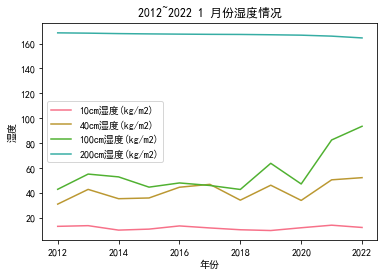

In [31]:

for i in ['10cm湿度(kg/m2)', '40cm湿度(kg/m2)',
       '100cm湿度(kg/m2)', '200cm湿度(kg/m2)']:
    plt.plot(temp['年份'].values,temp[i].values,label=i)

plt.legend()
plt.xlabel( '年份')
plt.ylabel( '湿度')
plt.title( '2012~2022 1 月份湿度情况')
plt.savefig('./Q2 fig/2012~2022 1 月份湿度情况.jpg')

In [24]:
dataset=temp[['10cm湿度(kg/m2)', '40cm湿度(kg/m2)','100cm湿度(kg/m2)', '200cm湿度(kg/m2)','土壤蒸发量(W/m2)','土壤蒸发量(mm)']]

In [25]:
#########LSTM多变量模型#############
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences)-1:
            break
        # 最关键的不一样在这一步
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
def mean_absolute_percentage_error(y_true, y_pred): 

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def fitlstmmodel(dataset,n_steps=1):
    #dataset：数据标准化后的dataset
    # n_steps：分片大小，默认为1
    #依次为：'PM2.5','AQI',  'PM10', 'SO2', 'CO', 'NO2', 'O3_8h', '最高气温', '最低气温'

    in_seq1= dataset[:,0].reshape((dataset.shape[0], 1))
    in_seq2= dataset[:,1].reshape((dataset.shape[0], 1))
    in_seq3= dataset[:,2].reshape((dataset.shape[0], 1))
    in_seq4= dataset[:,3].reshape((dataset.shape[0], 1))
    in_seq5= dataset[:,4].reshape((dataset.shape[0], 1))
    in_seq6= dataset[:,5].reshape((dataset.shape[0], 1))

    
    dataset = np.hstack((in_seq1, in_seq2, in_seq3, in_seq4,in_seq5,in_seq6))
    X, y = split_sequences(dataset, n_steps)
    n_features = X.shape[2]
    model = Sequential()
    model.add(LSTM(300, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(300, activation='relu'))

    # 和多对一不同点在于，这里多对多的Dense的神经元=features数目
    model.add(Dense(n_features))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=100, verbose=2,shuffle=False)
    model.save('lstm_model.h5')
    last_input=np.array(dataset[-1:,:])
    return X,y,last_input,n_features,n_steps

In [26]:

# 将整型变为float
dataset = dataset.astype('float32')
#对数据集合进行标准化
scaler = MinMaxScaler(feature_range=(0, 1))

dataset=scaler.fit_transform(dataset)
#输入为标准化后的dataset 	#输出：X为lstm的输入，y为lstm的输出，x_input_last为最后一行dataset的数据，用于预测未来的输入,n_features是特征维度，n_steps是切片分层
X,y,last_input,n_features,n_steps=fitlstmmodel(dataset,n_steps=1)
#输入1为lstm的输入X，输入2为lstm的输出y，用于训练模型,输入3为标准化模型
#输出：testPredict为预测close的训练数据，testY为close的真实数据
#该函数目标输出训练的RMSE以及预测与训练数据的对比


Epoch 1/100
1/1 - 3s - loss: 0.2790 - 3s/epoch - 3s/step
Epoch 2/100
1/1 - 0s - loss: 0.2758 - 15ms/epoch - 15ms/step
Epoch 3/100
1/1 - 0s - loss: 0.2729 - 20ms/epoch - 20ms/step
Epoch 4/100
1/1 - 0s - loss: 0.2698 - 18ms/epoch - 18ms/step
Epoch 5/100
1/1 - 0s - loss: 0.2667 - 17ms/epoch - 17ms/step
Epoch 6/100
1/1 - 0s - loss: 0.2633 - 12ms/epoch - 12ms/step
Epoch 7/100
1/1 - 0s - loss: 0.2598 - 12ms/epoch - 12ms/step
Epoch 8/100
1/1 - 0s - loss: 0.2559 - 12ms/epoch - 12ms/step
Epoch 9/100
1/1 - 0s - loss: 0.2517 - 17ms/epoch - 17ms/step
Epoch 10/100
1/1 - 0s - loss: 0.2471 - 16ms/epoch - 16ms/step
Epoch 11/100
1/1 - 0s - loss: 0.2421 - 16ms/epoch - 16ms/step
Epoch 12/100
1/1 - 0s - loss: 0.2368 - 15ms/epoch - 15ms/step
Epoch 13/100
1/1 - 0s - loss: 0.2309 - 17ms/epoch - 17ms/step
Epoch 14/100
1/1 - 0s - loss: 0.2247 - 16ms/epoch - 16ms/step
Epoch 15/100
1/1 - 0s - loss: 0.2179 - 14ms/epoch - 14ms/step
Epoch 16/100
1/1 - 0s - loss: 0.2107 - 12ms/epoch - 12ms/step
Epoch 17/100
1/1 - 0s

1/1 [==============================] - 0s 466ms/step
MAPE :
10.826966911554337
RMSE :
1.5687119
MAE :
1.3196791


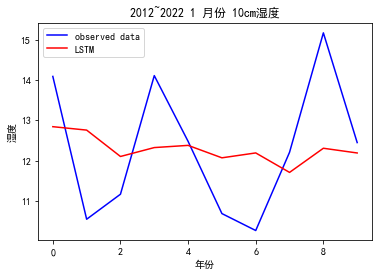

MAPE :
12.902763485908508
RMSE :
5.7672877
MAE :
5.263393


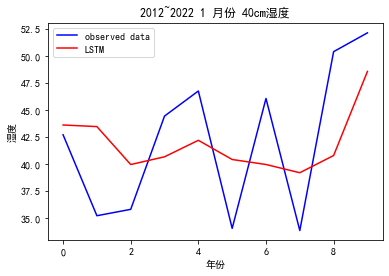

MAPE :
16.081097722053528
RMSE :
12.084138
MAE :
9.360518


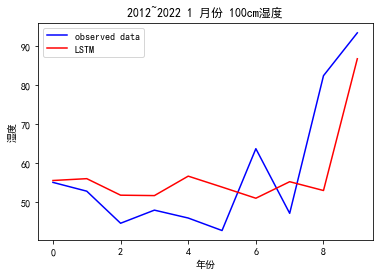

MAPE :
0.22335455287247896
RMSE :
0.5314843
MAE :
0.37227172


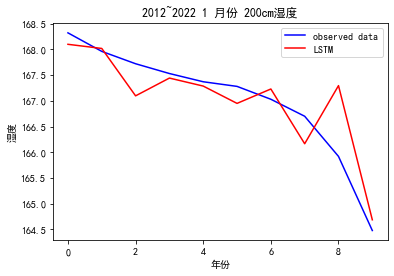

In [29]:

###预测与评分
def Predict_RMSE_BA(X,y,scaler):
    model=load_model('lstm_model.h5') 
    trainPredict = model.predict(X)
    testPredict = scaler.inverse_transform(trainPredict)
    testY = scaler.inverse_transform(y)
    score(testY[:,0], testPredict[:,0])
    
    #'10cm湿度(kg/m2)', '40cm湿度(kg/m2)','100cm湿度(kg/m2)', '200cm湿度(kg/m2)'
    plt.plot(testY[:,0],color='blue', label='observed data')
    plt.plot(testPredict[:,0], color='red', label='LSTM')
    plt.xlabel( '年份')
    plt.ylabel( '湿度')
    plt.title( '2012~2022 1 月份 10cm湿度')
    plt.legend() # 显示图例
    
    plt.savefig('./Q2 fig/2012~2022 1 月份10cm湿度.jpg')
    plt.show()
    #'10cm湿度(kg/m2)', '40cm湿度(kg/m2)','100cm湿度(kg/m2)', '200cm湿度(kg/m2)'   
    score(testY[:,1], testPredict[:,1])
    plt.plot(testY[:,1],color='blue', label='observed data')
    plt.plot(testPredict[:,1], color='red', label='LSTM')
    plt.xlabel( '年份')
    plt.ylabel( '湿度')
    plt.title( '2012~2022 1 月份 40cm湿度')
    plt.legend() # 显示图例
    
    plt.savefig('./Q2 fig/2012~2022 1 月份 40cm湿度.jpg')
    plt.show()
    
    #'10cm湿度(kg/m2)', '40cm湿度(kg/m2)','100cm湿度(kg/m2)', '200cm湿度(kg/m2)'   
    score(testY[:,2], testPredict[:,2])
    plt.plot(testY[:,2],color='blue', label='observed data')
    plt.plot(testPredict[:,2], color='red', label='LSTM')
    plt.xlabel( '年份')
    plt.ylabel( '湿度')
    plt.title( '2012~2022 1 月份 100cm湿度')
    plt.legend() # 显示图例
    
    plt.savefig('./Q2 fig/2012~2022 1 月份 100cm湿度.jpg')
    plt.show()
    
        #'10cm湿度(kg/m2)', '40cm湿度(kg/m2)','100cm湿度(kg/m2)', '200cm湿度(kg/m2)'   
    score(testY[:,3], testPredict[:,3])
    plt.plot(testY[:,3],color='blue', label='observed data')
    plt.plot(testPredict[:,3], color='red', label='LSTM')
    plt.xlabel( '年份')
    plt.ylabel( '湿度')
    plt.title( '2012~2022 1 月份 200cm湿度')
    plt.legend() # 显示图例
    plt.savefig('./Q2 fig/2012~2022 1 月份 200cm湿度.jpg')
    plt.show()
    

    
    
    return testPredict,testY
def score(y_true, y_pre):
    # MSE
    print("MAPE :")
    print(mean_absolute_percentage_error(y_true, y_pre)) 
    # RMSE
    print("RMSE :")
    print(np.sqrt(metrics.mean_squared_error(y_true, y_pre))) 
    # MAE
    print("MAE :")
    print(metrics.mean_absolute_error(y_true, y_pre)) 
    # # R2
    # print("R2 :")
    # print(np.abs(r2_score(y_true,y_pre)))
testPredict,testY=Predict_RMSE_BA(X,y,scaler)


In [28]:
def Predict_future_plot(predict_forword_number,x_input,n_features,n_steps,scaler,testPredict,testY):
    model=load_model('lstm_model.h5') 
    predict_list=[]
    predict_list.append(x_input)
    while len(predict_list) < predict_forword_number:

        x_input = predict_list[-1].reshape((-1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
         #预测新值
        predict_list.append(yhat)
    #取出    
    
    Predict_forword = scaler.inverse_transform(np.array([ i.reshape(-1,1)[:,0].tolist() for i in predict_list]))
    return Predict_forword[1:,:].tolist()

y_pre=Predict_future_plot(3,last_input,n_features,n_steps,scaler,testPredict,testY)
y_pre

[[11.584190001991868,
  40.59527526112526,
  63.48253678018638,
  165.375682048491,
  0.4163001339130223,
  0.45651831242698016],
 [11.678085832562774,
  38.562579573673695,
  53.45101807041153,
  166.21836227624055,
  0.49491525121866686,
  0.5318837949694042]]

Epoch 1/100
1/1 - 3s - loss: 0.2951 - 3s/epoch - 3s/step
Epoch 2/100
1/1 - 0s - loss: 0.2916 - 11ms/epoch - 11ms/step
Epoch 3/100
1/1 - 0s - loss: 0.2883 - 12ms/epoch - 12ms/step
Epoch 4/100
1/1 - 0s - loss: 0.2850 - 14ms/epoch - 14ms/step
Epoch 5/100
1/1 - 0s - loss: 0.2815 - 12ms/epoch - 12ms/step
Epoch 6/100
1/1 - 0s - loss: 0.2778 - 11ms/epoch - 11ms/step
Epoch 7/100
1/1 - 0s - loss: 0.2739 - 11ms/epoch - 11ms/step
Epoch 8/100
1/1 - 0s - loss: 0.2696 - 10ms/epoch - 10ms/step
Epoch 9/100
1/1 - 0s - loss: 0.2649 - 13ms/epoch - 13ms/step
Epoch 10/100
1/1 - 0s - loss: 0.2598 - 11ms/epoch - 11ms/step
Epoch 11/100
1/1 - 0s - loss: 0.2542 - 11ms/epoch - 11ms/step
Epoch 12/100
1/1 - 0s - loss: 0.2481 - 10ms/epoch - 10ms/step
Epoch 13/100
1/1 - 0s - loss: 0.2415 - 9ms/epoch - 9ms/step
Epoch 14/100
1/1 - 0s - loss: 0.2344 - 10ms/epoch - 10ms/step
Epoch 15/100
1/1 - 0s - loss: 0.2267 - 10ms/epoch - 10ms/step
Epoch 16/100
1/1 - 0s - loss: 0.2185 - 12ms/epoch - 12ms/step
Epoch 17/100
1/1 - 0s -

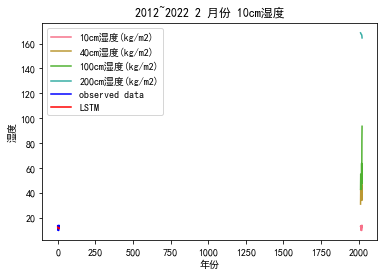

MAPE :
12.137651443481445
RMSE :
5.8250446
MAE :
4.963113


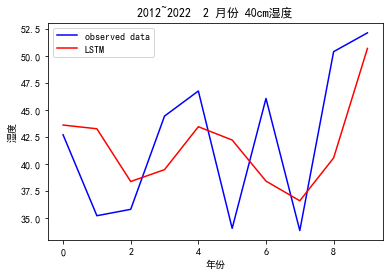

MAPE :
16.270221769809723
RMSE :
12.71598
MAE :
9.546302


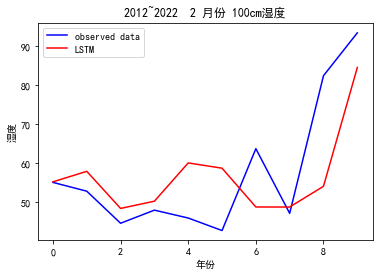

MAPE :
0.18492130329832435
RMSE :
0.43362823
MAE :
0.30818024


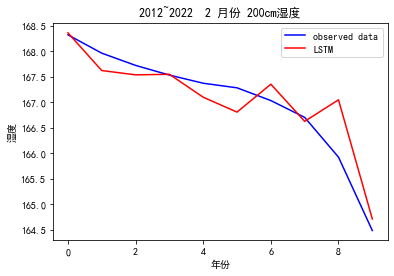

[[10.776710767922351,
  39.097665205009676,
  59.92519155824679,
  165.10456119206404,
  0.3861885196678948,
  0.36924731084678764],
 [10.886154220661746,
  37.58422931797616,
  52.89690495921492,
  165.86438491549615,
  0.5270427839185466,
  0.5160191122195144]]

In [33]:
kkk=2


temp=data[data['月份']==kkk]
temp=temp.sort_values('年份')
temp.reset_index(inplace=True,drop=True)


for i in ['10cm湿度(kg/m2)', '40cm湿度(kg/m2)',
       '100cm湿度(kg/m2)', '200cm湿度(kg/m2)']:
    plt.plot(temp['年份'].values,temp[i].values,label=i)

plt.legend()
plt.xlabel( '年份')
plt.ylabel( '湿度')
plt.title( '2012~2022 %d 月份湿度情况'%kkk)
plt.savefig('./Q2 fig/2012~2022%d 月份湿度情况.jpg'%kkk)

dataset=temp[['10cm湿度(kg/m2)', '40cm湿度(kg/m2)','100cm湿度(kg/m2)', '200cm湿度(kg/m2)','土壤蒸发量(W/m2)','土壤蒸发量(mm)']]




#########LSTM多变量模型#############
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences)-1:
            break
        # 最关键的不一样在这一步
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
def mean_absolute_percentage_error(y_true, y_pred): 

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def fitlstmmodel(dataset,n_steps=1):
    #dataset：数据标准化后的dataset
    # n_steps：分片大小，默认为1
    #依次为：'PM2.5','AQI',  'PM10', 'SO2', 'CO', 'NO2', 'O3_8h', '最高气温', '最低气温'

    in_seq1= dataset[:,0].reshape((dataset.shape[0], 1))
    in_seq2= dataset[:,1].reshape((dataset.shape[0], 1))
    in_seq3= dataset[:,2].reshape((dataset.shape[0], 1))
    in_seq4= dataset[:,3].reshape((dataset.shape[0], 1))
    in_seq5= dataset[:,4].reshape((dataset.shape[0], 1))
    in_seq6= dataset[:,5].reshape((dataset.shape[0], 1))

    
    dataset = np.hstack((in_seq1, in_seq2, in_seq3, in_seq4,in_seq5,in_seq6))
    X, y = split_sequences(dataset, n_steps)
    n_features = X.shape[2]
    model = Sequential()
    model.add(LSTM(300, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(300, activation='relu'))

    # 和多对一不同点在于，这里多对多的Dense的神经元=features数目
    model.add(Dense(n_features))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=100, verbose=2,shuffle=False)
    model.save('lstm_model.h5')
    last_input=np.array(dataset[-1:,:])
    return X,y,last_input,n_features,n_steps


# 将整型变为float
dataset = dataset.astype('float32')
#对数据集合进行标准化
scaler = MinMaxScaler(feature_range=(0, 1))

dataset=scaler.fit_transform(dataset)
#输入为标准化后的dataset 	#输出：X为lstm的输入，y为lstm的输出，x_input_last为最后一行dataset的数据，用于预测未来的输入,n_features是特征维度，n_steps是切片分层
X,y,last_input,n_features,n_steps=fitlstmmodel(dataset,n_steps=1)
#输入1为lstm的输入X，输入2为lstm的输出y，用于训练模型,输入3为标准化模型
#输出：testPredict为预测close的训练数据，testY为close的真实数据
#该函数目标输出训练的RMSE以及预测与训练数据的对比


###预测与评分
def Predict_RMSE_BA(X,y,scaler):
    model=load_model('lstm_model.h5') 
    trainPredict = model.predict(X)
    testPredict = scaler.inverse_transform(trainPredict)
    testY = scaler.inverse_transform(y)
    score(testY[:,0], testPredict[:,0])
    
    #'10cm湿度(kg/m2)', '40cm湿度(kg/m2)','100cm湿度(kg/m2)', '200cm湿度(kg/m2)'
    plt.plot(testY[:,0],color='blue', label='observed data')
    plt.plot(testPredict[:,0], color='red', label='LSTM')
    plt.xlabel( '年份')
    plt.ylabel( '湿度')
    plt.title( '2012~2022 %d 月份 10cm湿度'%kkk)
    plt.legend() # 显示图例
    
    plt.savefig('./Q2 fig/2012~2022 %d 月份10cm湿度.jpg'%kkk)
    plt.show()
    #'10cm湿度(kg/m2)', '40cm湿度(kg/m2)','100cm湿度(kg/m2)', '200cm湿度(kg/m2)'   
    score(testY[:,1], testPredict[:,1])
    plt.plot(testY[:,1],color='blue', label='observed data')
    plt.plot(testPredict[:,1], color='red', label='LSTM')
    plt.xlabel( '年份')
    plt.ylabel( '湿度')
    plt.title( '2012~2022  %d 月份 40cm湿度'%kkk)
    plt.legend() # 显示图例

    plt.savefig('./Q2 fig/2012~2022  %d 月份 40cm湿度.jpg'%kkk)
    plt.show()
    
    #'10cm湿度(kg/m2)', '40cm湿度(kg/m2)','100cm湿度(kg/m2)', '200cm湿度(kg/m2)'   
    score(testY[:,2], testPredict[:,2])
    plt.plot(testY[:,2],color='blue', label='observed data')
    plt.plot(testPredict[:,2], color='red', label='LSTM')
    plt.xlabel( '年份')
    plt.ylabel( '湿度')
    plt.title( '2012~2022  %d 月份 100cm湿度'%kkk)
    plt.legend() # 显示图例

    plt.savefig('./Q2 fig/2012~2022  %d 月份 100cm湿度.jpg'%kkk)
    plt.show()
    
        #'10cm湿度(kg/m2)', '40cm湿度(kg/m2)','100cm湿度(kg/m2)', '200cm湿度(kg/m2)'   
    score(testY[:,3], testPredict[:,3])
    plt.plot(testY[:,3],color='blue', label='observed data')
    plt.plot(testPredict[:,3], color='red', label='LSTM')
    plt.xlabel( '年份')
    plt.ylabel( '湿度')
    plt.title( '2012~2022  %d 月份 200cm湿度'%kkk)
    plt.legend() # 显示图例

    plt.savefig('./Q2 fig/2012~2022  %d 月份 200cm湿度.jpg'%kkk)
    plt.show()
    
    
    return testPredict,testY
def score(y_true, y_pre):
    # MSE
    print("MAPE :")
    print(mean_absolute_percentage_error(y_true, y_pre)) 
    # RMSE
    print("RMSE :")
    print(np.sqrt(metrics.mean_squared_error(y_true, y_pre))) 
    # MAE
    print("MAE :")
    print(metrics.mean_absolute_error(y_true, y_pre)) 
    # # R2
    # print("R2 :")
    # print(np.abs(r2_score(y_true,y_pre)))
testPredict,testY=Predict_RMSE_BA(X,y,scaler)


def Predict_future_plot(predict_forword_number,x_input,n_features,n_steps,scaler,testPredict,testY):
    model=load_model('lstm_model.h5') 
    predict_list=[]
    predict_list.append(x_input)
    while len(predict_list) < predict_forword_number:

        x_input = predict_list[-1].reshape((-1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
         #预测新值
        predict_list.append(yhat)
    #取出    
    
    Predict_forword = scaler.inverse_transform(np.array([ i.reshape(-1,1)[:,0].tolist() for i in predict_list]))
    return Predict_forword[1:,:].tolist()

y_pre=Predict_future_plot(3,last_input,n_features,n_steps,scaler,testPredict,testY)
y_pre

-----------------这是月份分界线-----------------------
3
--------------------这是月份分界线--------------------


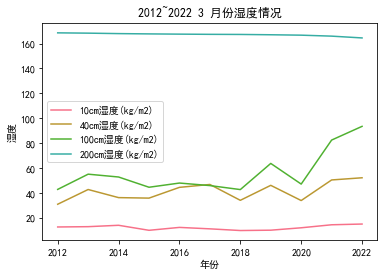

Epoch 1/100
1/1 - 4s - loss: 0.2724 - 4s/epoch - 4s/step
Epoch 2/100
1/1 - 0s - loss: 0.2694 - 11ms/epoch - 11ms/step
Epoch 3/100
1/1 - 0s - loss: 0.2665 - 14ms/epoch - 14ms/step
Epoch 4/100
1/1 - 0s - loss: 0.2635 - 14ms/epoch - 14ms/step
Epoch 5/100
1/1 - 0s - loss: 0.2605 - 13ms/epoch - 13ms/step
Epoch 6/100
1/1 - 0s - loss: 0.2573 - 11ms/epoch - 11ms/step
Epoch 7/100
1/1 - 0s - loss: 0.2538 - 9ms/epoch - 9ms/step
Epoch 8/100
1/1 - 0s - loss: 0.2500 - 10ms/epoch - 10ms/step
Epoch 9/100
1/1 - 0s - loss: 0.2459 - 11ms/epoch - 11ms/step
Epoch 10/100
1/1 - 0s - loss: 0.2414 - 10ms/epoch - 10ms/step
Epoch 11/100
1/1 - 0s - loss: 0.2365 - 19ms/epoch - 19ms/step
Epoch 12/100
1/1 - 0s - loss: 0.2313 - 13ms/epoch - 13ms/step
Epoch 13/100
1/1 - 0s - loss: 0.2255 - 15ms/epoch - 15ms/step
Epoch 14/100
1/1 - 0s - loss: 0.2194 - 12ms/epoch - 12ms/step
Epoch 15/100
1/1 - 0s - loss: 0.2127 - 11ms/epoch - 11ms/step
Epoch 16/100
1/1 - 0s - loss: 0.2056 - 9ms/epoch - 9ms/step
Epoch 17/100
1/1 - 0s - l

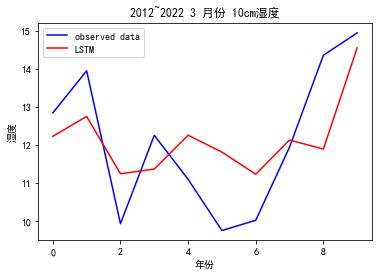

MAPE :
13.459983468055725
RMSE :
6.0181613
MAE :
5.496185


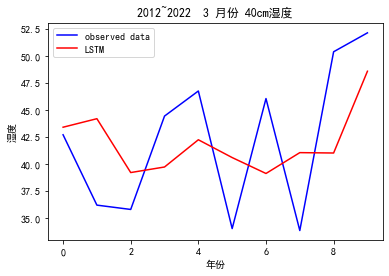

MAPE :
17.38412380218506
RMSE :
12.297621
MAE :
10.143795


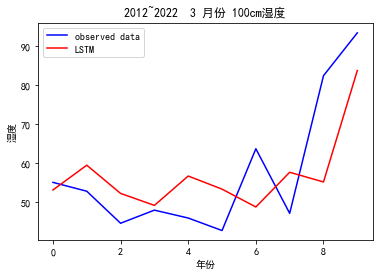

MAPE :
0.19783643074333668
RMSE :
0.43299204
MAE :
0.32925263


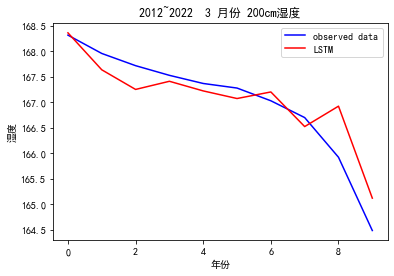

[[15.59180049655378, 51.81714031370198, 94.03107960091599, 164.59488354805535, 8.18511870628843, 8.492918597060036], [15.698300258214177, 52.245225309205416, 95.4216184316856, 164.55888956900202, 8.307930321337318, 8.617089896818644]]
-----------------这是月份分界线-----------------------
4
--------------------这是月份分界线--------------------


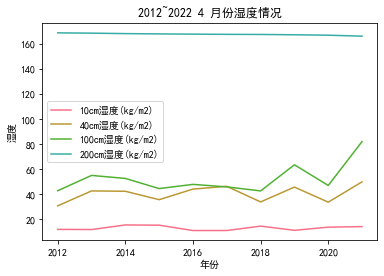

Epoch 1/100
1/1 - 3s - loss: 0.2872 - 3s/epoch - 3s/step
Epoch 2/100
1/1 - 0s - loss: 0.2838 - 10ms/epoch - 10ms/step
Epoch 3/100
1/1 - 0s - loss: 0.2803 - 14ms/epoch - 14ms/step
Epoch 4/100
1/1 - 0s - loss: 0.2768 - 13ms/epoch - 13ms/step
Epoch 5/100
1/1 - 0s - loss: 0.2731 - 11ms/epoch - 11ms/step
Epoch 6/100
1/1 - 0s - loss: 0.2691 - 9ms/epoch - 9ms/step
Epoch 7/100
1/1 - 0s - loss: 0.2649 - 10ms/epoch - 10ms/step
Epoch 8/100
1/1 - 0s - loss: 0.2602 - 14ms/epoch - 14ms/step
Epoch 9/100
1/1 - 0s - loss: 0.2551 - 13ms/epoch - 13ms/step
Epoch 10/100
1/1 - 0s - loss: 0.2496 - 11ms/epoch - 11ms/step
Epoch 11/100
1/1 - 0s - loss: 0.2437 - 11ms/epoch - 11ms/step
Epoch 12/100
1/1 - 0s - loss: 0.2372 - 10ms/epoch - 10ms/step
Epoch 13/100
1/1 - 0s - loss: 0.2302 - 15ms/epoch - 15ms/step
Epoch 14/100
1/1 - 0s - loss: 0.2227 - 15ms/epoch - 15ms/step
Epoch 15/100
1/1 - 0s - loss: 0.2146 - 17ms/epoch - 17ms/step
Epoch 16/100
1/1 - 0s - loss: 0.2060 - 16ms/epoch - 16ms/step
Epoch 17/100
1/1 - 0s -

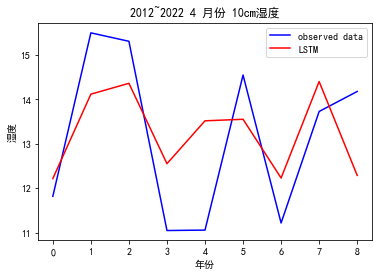

MAPE :
9.789717197418213
RMSE :
4.950562
MAE :
4.074045


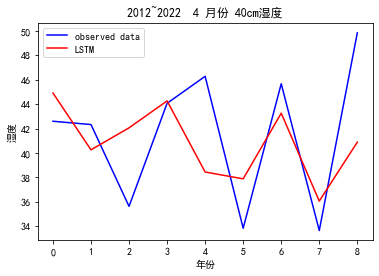

MAPE :
13.034050166606903
RMSE :
10.448404
MAE :
7.5360203


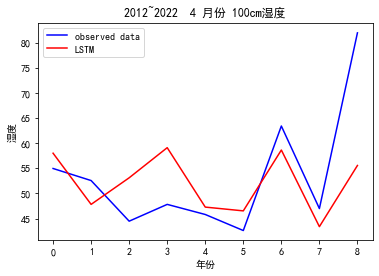

MAPE :
0.2012328477576375
RMSE :
0.44950208
MAE :
0.33610874


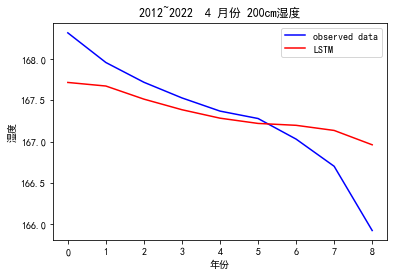

[[15.710848422653568, 34.92483571770997, 41.165826466424804, 167.12107924341552, 16.129007377892492, 16.871146621533313], [12.38388387127234, 43.90535620136546, 59.820736188842325, 167.21254742815017, 6.445985376909265, 6.918754830281441]]
-----------------这是月份分界线-----------------------
5
--------------------这是月份分界线--------------------


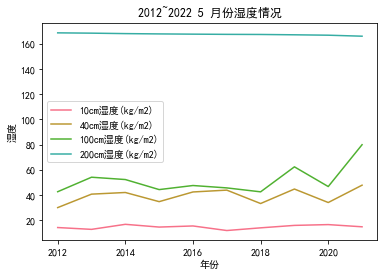

Epoch 1/100
1/1 - 4s - loss: 0.3646 - 4s/epoch - 4s/step
Epoch 2/100
1/1 - 0s - loss: 0.3608 - 10ms/epoch - 10ms/step
Epoch 3/100
1/1 - 0s - loss: 0.3572 - 13ms/epoch - 13ms/step
Epoch 4/100
1/1 - 0s - loss: 0.3536 - 11ms/epoch - 11ms/step
Epoch 5/100
1/1 - 0s - loss: 0.3498 - 16ms/epoch - 16ms/step
Epoch 6/100
1/1 - 0s - loss: 0.3457 - 14ms/epoch - 14ms/step
Epoch 7/100
1/1 - 0s - loss: 0.3413 - 17ms/epoch - 17ms/step
Epoch 8/100
1/1 - 0s - loss: 0.3365 - 14ms/epoch - 14ms/step
Epoch 9/100
1/1 - 0s - loss: 0.3312 - 11ms/epoch - 11ms/step
Epoch 10/100
1/1 - 0s - loss: 0.3254 - 17ms/epoch - 17ms/step
Epoch 11/100
1/1 - 0s - loss: 0.3190 - 13ms/epoch - 13ms/step
Epoch 12/100
1/1 - 0s - loss: 0.3121 - 14ms/epoch - 14ms/step
Epoch 13/100
1/1 - 0s - loss: 0.3045 - 15ms/epoch - 15ms/step
Epoch 14/100
1/1 - 0s - loss: 0.2963 - 11ms/epoch - 11ms/step
Epoch 15/100
1/1 - 0s - loss: 0.2873 - 15ms/epoch - 15ms/step
Epoch 16/100
1/1 - 0s - loss: 0.2776 - 13ms/epoch - 13ms/step
Epoch 17/100
1/1 - 0s

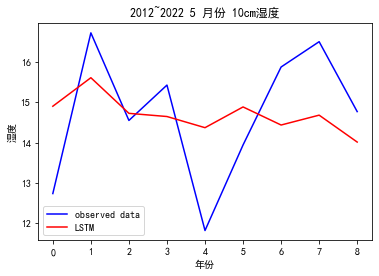

MAPE :
11.231140047311783
RMSE :
5.101983
MAE :
4.4313755


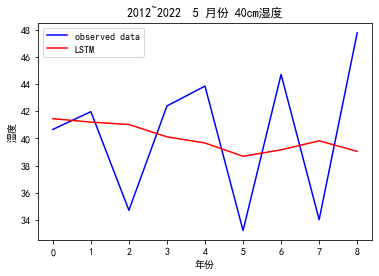

MAPE :
14.191947877407074
RMSE :
10.990106
MAE :
8.079205


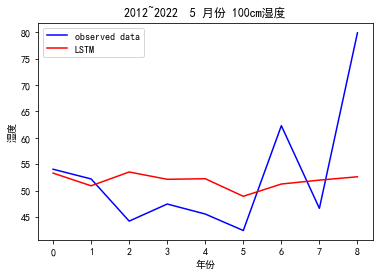

MAPE :
0.24069054052233696
RMSE :
0.494791
MAE :
0.40220982


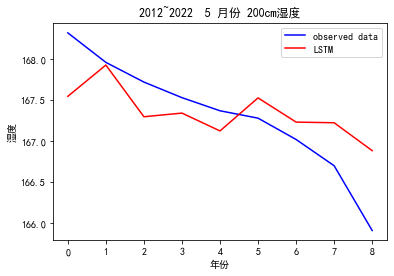

[[14.943723742239287, 38.865467355190795, 50.072933570303576, 167.32469478353437, 17.13407022975862, 18.173249730022054], [14.551661710049439, 39.625946019127404, 51.821855792152235, 167.23383213767661, 16.134561426758427, 17.150131186489237]]
-----------------这是月份分界线-----------------------
6
--------------------这是月份分界线--------------------


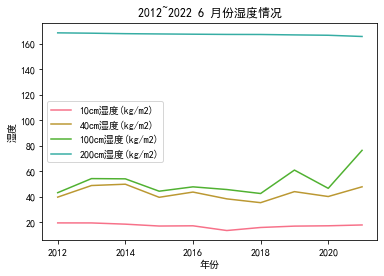

Epoch 1/100
1/1 - 4s - loss: 0.3203 - 4s/epoch - 4s/step
Epoch 2/100
1/1 - 0s - loss: 0.3166 - 11ms/epoch - 11ms/step
Epoch 3/100
1/1 - 0s - loss: 0.3130 - 11ms/epoch - 11ms/step
Epoch 4/100
1/1 - 0s - loss: 0.3093 - 15ms/epoch - 15ms/step
Epoch 5/100
1/1 - 0s - loss: 0.3056 - 13ms/epoch - 13ms/step
Epoch 6/100
1/1 - 0s - loss: 0.3016 - 9ms/epoch - 9ms/step
Epoch 7/100
1/1 - 0s - loss: 0.2973 - 10ms/epoch - 10ms/step
Epoch 8/100
1/1 - 0s - loss: 0.2925 - 10ms/epoch - 10ms/step
Epoch 9/100
1/1 - 0s - loss: 0.2873 - 11ms/epoch - 11ms/step
Epoch 10/100
1/1 - 0s - loss: 0.2817 - 9ms/epoch - 9ms/step
Epoch 11/100
1/1 - 0s - loss: 0.2754 - 11ms/epoch - 11ms/step
Epoch 12/100
1/1 - 0s - loss: 0.2686 - 11ms/epoch - 11ms/step
Epoch 13/100
1/1 - 0s - loss: 0.2612 - 10ms/epoch - 10ms/step
Epoch 14/100
1/1 - 0s - loss: 0.2531 - 10ms/epoch - 10ms/step
Epoch 15/100
1/1 - 0s - loss: 0.2443 - 10ms/epoch - 10ms/step
Epoch 16/100
1/1 - 0s - loss: 0.2348 - 19ms/epoch - 19ms/step
Epoch 17/100
1/1 - 0s - l

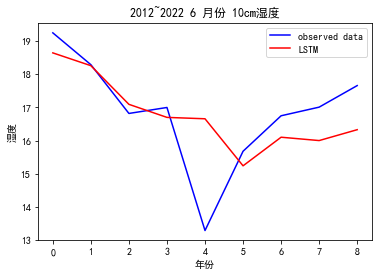

MAPE :
6.876113265752792
RMSE :
3.3068721
MAE :
2.867486


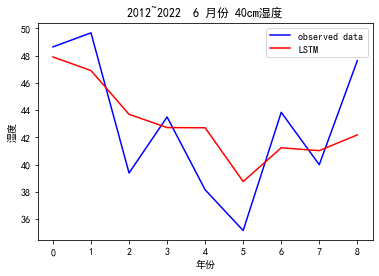

MAPE :
12.632156908512115
RMSE :
10.035385
MAE :
7.1837716


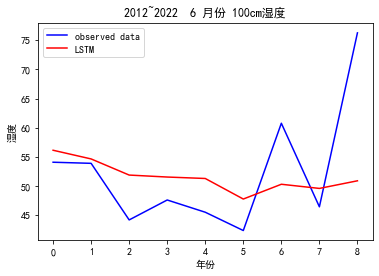

MAPE :
0.20928909070789814
RMSE :
0.5171318
MAE :
0.3488922


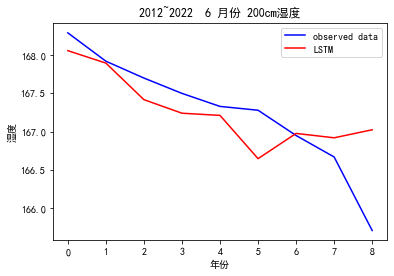

[[15.88442735927991, 40.907852787181184, 49.320806747065234, 166.84018088723315, 19.45534533731817, 20.2306905212756], [15.892157813079898, 40.842572945514966, 49.59023950812895, 166.8674189535282, 19.58800801457651, 20.27092832063794]]
-----------------这是月份分界线-----------------------
7
--------------------这是月份分界线--------------------


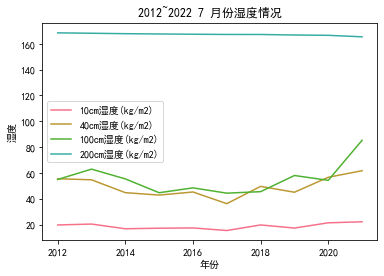

Epoch 1/100
1/1 - 4s - loss: 0.2937 - 4s/epoch - 4s/step
Epoch 2/100
1/1 - 0s - loss: 0.2901 - 10ms/epoch - 10ms/step
Epoch 3/100
1/1 - 0s - loss: 0.2867 - 11ms/epoch - 11ms/step
Epoch 4/100
1/1 - 0s - loss: 0.2834 - 10ms/epoch - 10ms/step
Epoch 5/100
1/1 - 0s - loss: 0.2799 - 10ms/epoch - 10ms/step
Epoch 6/100
1/1 - 0s - loss: 0.2761 - 19ms/epoch - 19ms/step
Epoch 7/100
1/1 - 0s - loss: 0.2721 - 12ms/epoch - 12ms/step
Epoch 8/100
1/1 - 0s - loss: 0.2676 - 12ms/epoch - 12ms/step
Epoch 9/100
1/1 - 0s - loss: 0.2628 - 13ms/epoch - 13ms/step
Epoch 10/100
1/1 - 0s - loss: 0.2575 - 10ms/epoch - 10ms/step
Epoch 11/100
1/1 - 0s - loss: 0.2516 - 13ms/epoch - 13ms/step
Epoch 12/100
1/1 - 0s - loss: 0.2453 - 19ms/epoch - 19ms/step
Epoch 13/100
1/1 - 0s - loss: 0.2384 - 16ms/epoch - 16ms/step
Epoch 14/100
1/1 - 0s - loss: 0.2309 - 32ms/epoch - 32ms/step
Epoch 15/100
1/1 - 0s - loss: 0.2228 - 22ms/epoch - 22ms/step
Epoch 16/100
1/1 - 0s - loss: 0.2141 - 29ms/epoch - 29ms/step
Epoch 17/100
1/1 - 0s

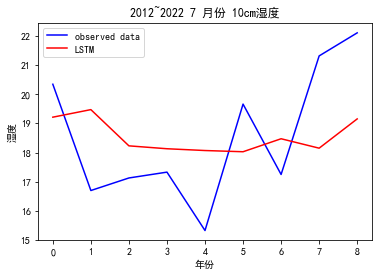

MAPE :
12.618477642536163
RMSE :
6.8567038
MAE :
6.0062513


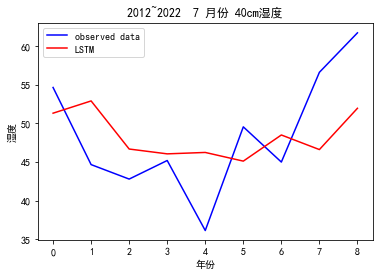

MAPE :
9.939686208963394
RMSE :
8.22883
MAE :
5.819047


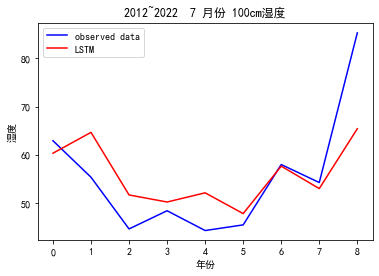

MAPE :
0.2711979439482093
RMSE :
0.5968735
MAE :
0.45237222


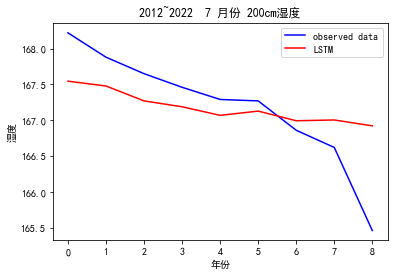

[[20.098027960545895, 55.99415816064297, 73.02522440607461, 166.96588989507686, 27.308213931755102, 30.482682667310204], [19.41610877863327, 52.59757782964094, 64.51781127326231, 167.23567333415005, 26.248268345381017, 28.64248872897996]]
-----------------这是月份分界线-----------------------
8
--------------------这是月份分界线--------------------


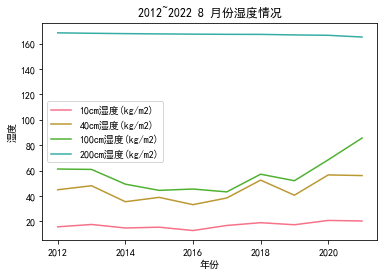

Epoch 1/100
1/1 - 3s - loss: 0.3330 - 3s/epoch - 3s/step
Epoch 2/100
1/1 - 0s - loss: 0.3289 - 11ms/epoch - 11ms/step
Epoch 3/100
1/1 - 0s - loss: 0.3251 - 12ms/epoch - 12ms/step
Epoch 4/100
1/1 - 0s - loss: 0.3213 - 12ms/epoch - 12ms/step
Epoch 5/100
1/1 - 0s - loss: 0.3173 - 11ms/epoch - 11ms/step
Epoch 6/100
1/1 - 0s - loss: 0.3131 - 9ms/epoch - 9ms/step
Epoch 7/100
1/1 - 0s - loss: 0.3085 - 11ms/epoch - 11ms/step
Epoch 8/100
1/1 - 0s - loss: 0.3034 - 14ms/epoch - 14ms/step
Epoch 9/100
1/1 - 0s - loss: 0.2979 - 10ms/epoch - 10ms/step
Epoch 10/100
1/1 - 0s - loss: 0.2918 - 11ms/epoch - 11ms/step
Epoch 11/100
1/1 - 0s - loss: 0.2852 - 12ms/epoch - 12ms/step
Epoch 12/100
1/1 - 0s - loss: 0.2779 - 15ms/epoch - 15ms/step
Epoch 13/100
1/1 - 0s - loss: 0.2700 - 15ms/epoch - 15ms/step
Epoch 14/100
1/1 - 0s - loss: 0.2614 - 12ms/epoch - 12ms/step
Epoch 15/100
1/1 - 0s - loss: 0.2520 - 12ms/epoch - 12ms/step
Epoch 16/100
1/1 - 0s - loss: 0.2419 - 10ms/epoch - 10ms/step
Epoch 17/100
1/1 - 0s -

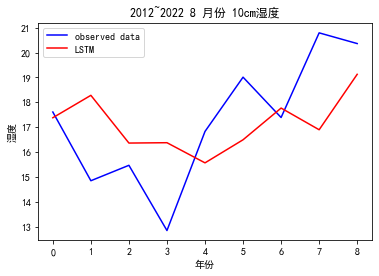

MAPE :
15.517190098762512
RMSE :
7.8932943
MAE :
6.767612


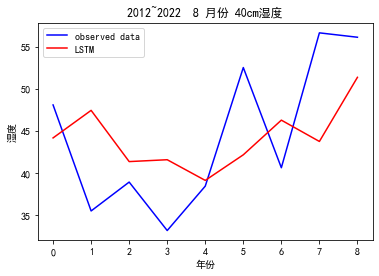

MAPE :
12.04017698764801
RMSE :
8.191925
MAE :
6.870923


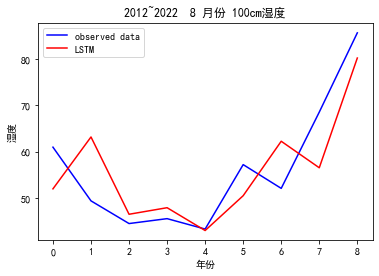

MAPE :
0.15044366009533405
RMSE :
0.36082572
MAE :
0.25089687


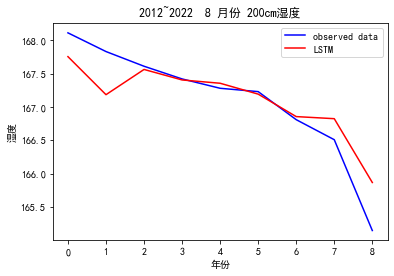

[[18.48588162063948, 49.55096575992451, 76.99222191304486, 165.70185914367732, 17.282170367672116, 18.235087633124174], [17.741601659347488, 47.11708271377549, 69.38031145344281, 166.0174712167178, 15.788908639615519, 16.686360472982344]]
-----------------这是月份分界线-----------------------
9
--------------------这是月份分界线--------------------


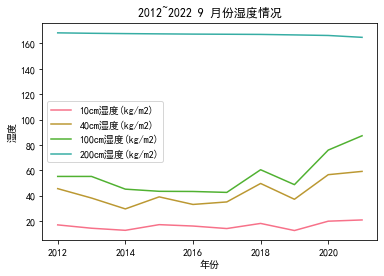

Epoch 1/100
1/1 - 3s - loss: 0.3184 - 3s/epoch - 3s/step
Epoch 2/100
1/1 - 0s - loss: 0.3147 - 12ms/epoch - 12ms/step
Epoch 3/100
1/1 - 0s - loss: 0.3111 - 13ms/epoch - 13ms/step
Epoch 4/100
1/1 - 0s - loss: 0.3075 - 11ms/epoch - 11ms/step
Epoch 5/100
1/1 - 0s - loss: 0.3038 - 11ms/epoch - 11ms/step
Epoch 6/100
1/1 - 0s - loss: 0.2998 - 11ms/epoch - 11ms/step
Epoch 7/100
1/1 - 0s - loss: 0.2955 - 11ms/epoch - 11ms/step
Epoch 8/100
1/1 - 0s - loss: 0.2908 - 10ms/epoch - 10ms/step
Epoch 9/100
1/1 - 0s - loss: 0.2857 - 10ms/epoch - 10ms/step
Epoch 10/100
1/1 - 0s - loss: 0.2802 - 11ms/epoch - 11ms/step
Epoch 11/100
1/1 - 0s - loss: 0.2742 - 11ms/epoch - 11ms/step
Epoch 12/100
1/1 - 0s - loss: 0.2678 - 13ms/epoch - 13ms/step
Epoch 13/100
1/1 - 0s - loss: 0.2608 - 10ms/epoch - 10ms/step
Epoch 14/100
1/1 - 0s - loss: 0.2532 - 14ms/epoch - 14ms/step
Epoch 15/100
1/1 - 0s - loss: 0.2451 - 15ms/epoch - 15ms/step
Epoch 16/100
1/1 - 0s - loss: 0.2365 - 15ms/epoch - 15ms/step
Epoch 17/100
1/1 - 0s

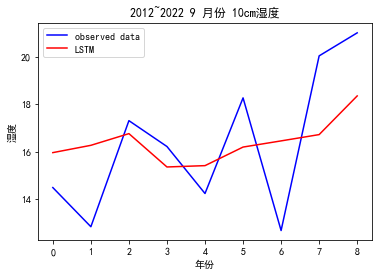

MAPE :
15.023179352283478
RMSE :
7.586184
MAE :
6.2433915


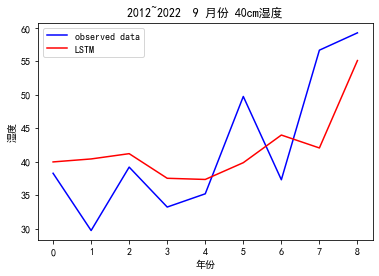

MAPE :
16.168509423732758
RMSE :
10.36465
MAE :
9.013966


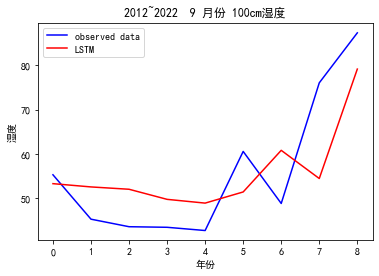

MAPE :
0.2706228755414486
RMSE :
0.5386902
MAE :
0.45162284


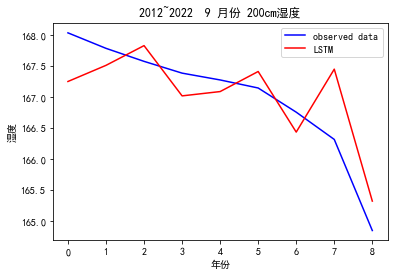

[[19.668028439653927, 62.346778275472225, 90.55740809584499, 164.66753019670278, 15.83587893923267, 16.056329110529084], [19.81543729856181, 63.166118419966296, 91.69758747282664, 164.6471931721061, 16.100351658436228, 16.31530133013701]]
-----------------这是月份分界线-----------------------
10
--------------------这是月份分界线--------------------


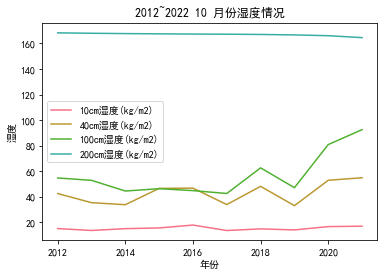

Epoch 1/100
1/1 - 3s - loss: 0.3345 - 3s/epoch - 3s/step
Epoch 2/100
1/1 - 0s - loss: 0.3307 - 11ms/epoch - 11ms/step
Epoch 3/100
1/1 - 0s - loss: 0.3271 - 16ms/epoch - 16ms/step
Epoch 4/100
1/1 - 0s - loss: 0.3235 - 10ms/epoch - 10ms/step
Epoch 5/100
1/1 - 0s - loss: 0.3197 - 12ms/epoch - 12ms/step
Epoch 6/100
1/1 - 0s - loss: 0.3156 - 10ms/epoch - 10ms/step
Epoch 7/100
1/1 - 0s - loss: 0.3113 - 12ms/epoch - 12ms/step
Epoch 8/100
1/1 - 0s - loss: 0.3065 - 10ms/epoch - 10ms/step
Epoch 9/100
1/1 - 0s - loss: 0.3013 - 10ms/epoch - 10ms/step
Epoch 10/100
1/1 - 0s - loss: 0.2956 - 11ms/epoch - 11ms/step
Epoch 11/100
1/1 - 0s - loss: 0.2895 - 10ms/epoch - 10ms/step
Epoch 12/100
1/1 - 0s - loss: 0.2828 - 10ms/epoch - 10ms/step
Epoch 13/100
1/1 - 0s - loss: 0.2755 - 9ms/epoch - 9ms/step
Epoch 14/100
1/1 - 0s - loss: 0.2677 - 10ms/epoch - 10ms/step
Epoch 15/100
1/1 - 0s - loss: 0.2593 - 11ms/epoch - 11ms/step
Epoch 16/100
1/1 - 0s - loss: 0.2504 - 10ms/epoch - 10ms/step
Epoch 17/100
1/1 - 0s -

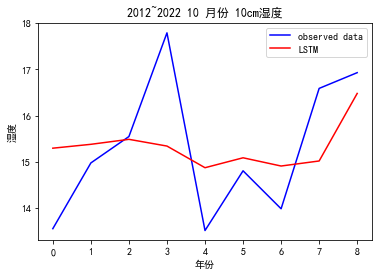

MAPE :
16.191893815994263
RMSE :
7.0243006
MAE :
6.562696


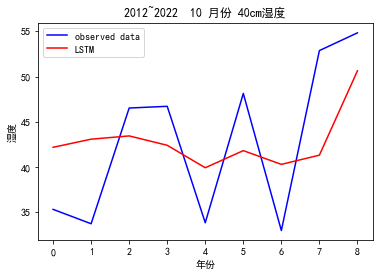

MAPE :
18.40536892414093
RMSE :
12.733888
MAE :
10.634122


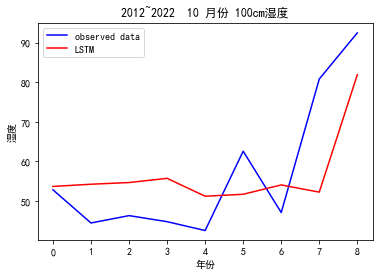

MAPE :
0.2860073233023286
RMSE :
0.5518849
MAE :
0.4764913


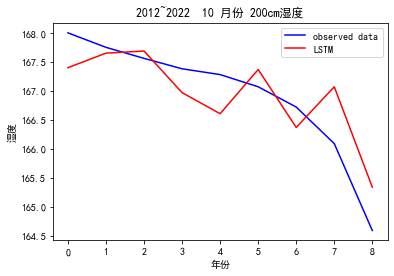

[[16.364207233736057, 50.43773409946916, 83.84767095358686, 164.81759671457996, 8.334467428053074, 9.35659817294047], [15.804040630273168, 46.74354028724884, 74.19105220908813, 165.10945299473013, 7.67319043944696, 8.476442550180323]]
-----------------这是月份分界线-----------------------
11
--------------------这是月份分界线--------------------


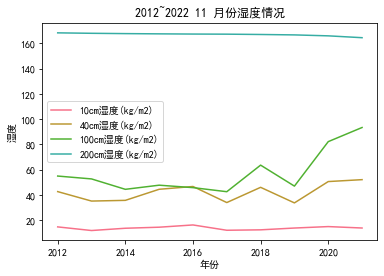

Epoch 1/100
1/1 - 3s - loss: 0.2820 - 3s/epoch - 3s/step
Epoch 2/100
1/1 - 0s - loss: 0.2787 - 12ms/epoch - 12ms/step
Epoch 3/100
1/1 - 0s - loss: 0.2755 - 12ms/epoch - 12ms/step
Epoch 4/100
1/1 - 0s - loss: 0.2723 - 13ms/epoch - 13ms/step
Epoch 5/100
1/1 - 0s - loss: 0.2690 - 10ms/epoch - 10ms/step
Epoch 6/100
1/1 - 0s - loss: 0.2655 - 10ms/epoch - 10ms/step
Epoch 7/100
1/1 - 0s - loss: 0.2617 - 11ms/epoch - 11ms/step
Epoch 8/100
1/1 - 0s - loss: 0.2577 - 12ms/epoch - 12ms/step
Epoch 9/100
1/1 - 0s - loss: 0.2533 - 10ms/epoch - 10ms/step
Epoch 10/100
1/1 - 0s - loss: 0.2485 - 10ms/epoch - 10ms/step
Epoch 11/100
1/1 - 0s - loss: 0.2434 - 11ms/epoch - 11ms/step
Epoch 12/100
1/1 - 0s - loss: 0.2379 - 12ms/epoch - 12ms/step
Epoch 13/100
1/1 - 0s - loss: 0.2319 - 13ms/epoch - 13ms/step
Epoch 14/100
1/1 - 0s - loss: 0.2255 - 11ms/epoch - 11ms/step
Epoch 15/100
1/1 - 0s - loss: 0.2186 - 11ms/epoch - 11ms/step
Epoch 16/100
1/1 - 0s - loss: 0.2113 - 11ms/epoch - 11ms/step
Epoch 17/100
1/1 - 0s

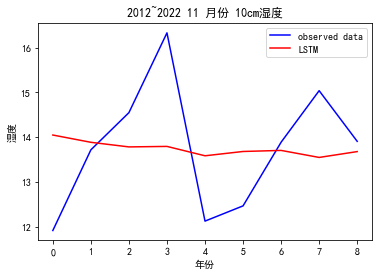

MAPE :
15.953236818313599
RMSE :
6.7468615
MAE :
6.5037026


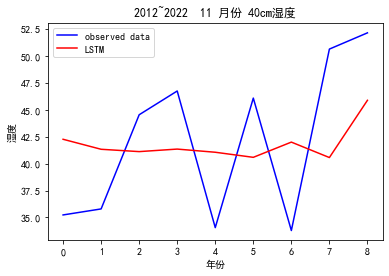

MAPE :
20.546850562095642
RMSE :
14.108078
MAE :
12.154835


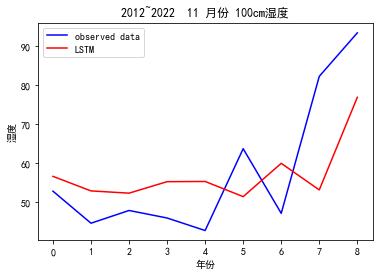

MAPE :
0.2129742642864585
RMSE :
0.44458175
MAE :
0.3542311


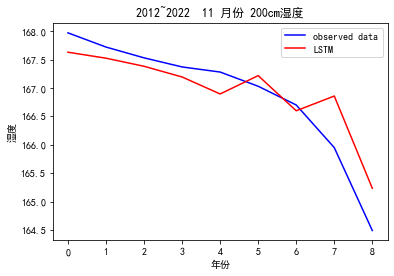

[[13.582948500502384, 46.38767040787043, 80.5098158008311, 164.71157797036483, 1.3761360784626817, 1.3753741907513486], [13.3813258874856, 43.99524416864307, 72.15937476762954, 164.9854500839179, 1.498621152340544, 1.518989526451308]]
-----------------这是月份分界线-----------------------
12
--------------------这是月份分界线--------------------


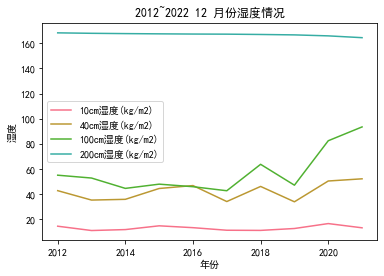

Epoch 1/100
1/1 - 3s - loss: 0.3173 - 3s/epoch - 3s/step
Epoch 2/100
1/1 - 0s - loss: 0.3138 - 13ms/epoch - 13ms/step
Epoch 3/100
1/1 - 0s - loss: 0.3101 - 13ms/epoch - 13ms/step
Epoch 4/100
1/1 - 0s - loss: 0.3066 - 13ms/epoch - 13ms/step
Epoch 5/100
1/1 - 0s - loss: 0.3028 - 11ms/epoch - 11ms/step
Epoch 6/100
1/1 - 0s - loss: 0.2989 - 12ms/epoch - 12ms/step
Epoch 7/100
1/1 - 0s - loss: 0.2946 - 10ms/epoch - 10ms/step
Epoch 8/100
1/1 - 0s - loss: 0.2900 - 10ms/epoch - 10ms/step
Epoch 9/100
1/1 - 0s - loss: 0.2850 - 11ms/epoch - 11ms/step
Epoch 10/100
1/1 - 0s - loss: 0.2795 - 10ms/epoch - 10ms/step
Epoch 11/100
1/1 - 0s - loss: 0.2737 - 10ms/epoch - 10ms/step
Epoch 12/100
1/1 - 0s - loss: 0.2673 - 11ms/epoch - 11ms/step
Epoch 13/100
1/1 - 0s - loss: 0.2604 - 10ms/epoch - 10ms/step
Epoch 14/100
1/1 - 0s - loss: 0.2531 - 11ms/epoch - 11ms/step
Epoch 15/100
1/1 - 0s - loss: 0.2451 - 10ms/epoch - 10ms/step
Epoch 16/100
1/1 - 0s - loss: 0.2367 - 10ms/epoch - 10ms/step
Epoch 17/100
1/1 - 0s

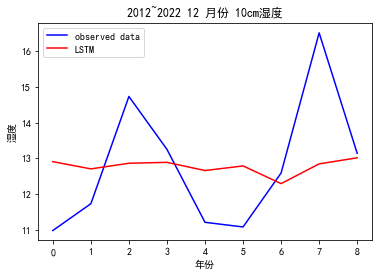

MAPE :
13.95711600780487
RMSE :
5.906755
MAE :
5.616104


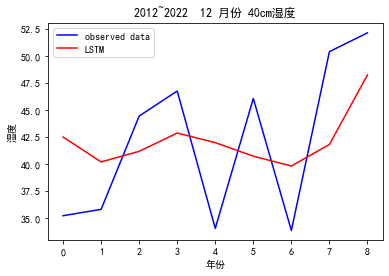

MAPE :
19.583727419376373
RMSE :
13.295052
MAE :
11.342941


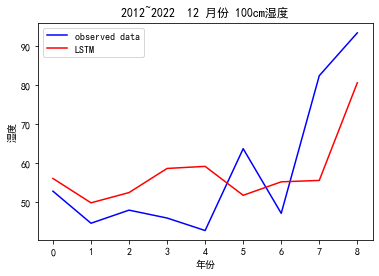

MAPE :
0.2717919182032347
RMSE :
0.5615261
MAE :
0.45251805


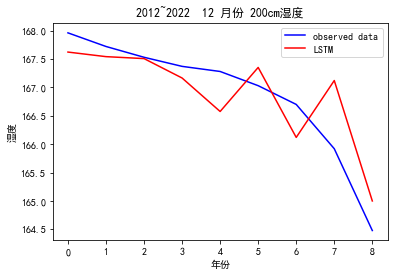

[[12.317976629892488, 42.60030934909209, 66.30580018065302, 164.89923795851894, 0.66869408031813, 0.7217445711674346], [12.207143767700773, 40.47758179793812, 58.684839207268965, 165.43618589243644, 0.6513325933790551, 0.7014862302391136]]


In [32]:
for kkk in range(3,13):
    print('-----------------这是月份分界线-----------------------')
    print(kkk)
    print('--------------------这是月份分界线--------------------')
    temp=data[data['月份']==kkk]
    temp=temp.sort_values('年份')
    temp.reset_index(inplace=True,drop=True)


    for i in ['10cm湿度(kg/m2)', '40cm湿度(kg/m2)',
           '100cm湿度(kg/m2)', '200cm湿度(kg/m2)']:
        plt.plot(temp['年份'].values,temp[i].values,label=i)

    plt.legend()
    plt.xlabel( '年份')
    plt.ylabel( '湿度')
    plt.title( '2012~2022 %d 月份湿度情况'%kkk)
    plt.savefig('./Q2 fig/2012~2022%d 月份湿度情况.jpg'%kkk)
    plt.show()
    dataset=temp[['10cm湿度(kg/m2)', '40cm湿度(kg/m2)','100cm湿度(kg/m2)', '200cm湿度(kg/m2)','土壤蒸发量(W/m2)','土壤蒸发量(mm)']]




    #########LSTM多变量模型#############
    def split_sequences(sequences, n_steps):
        X, y = list(), list()
        for i in range(len(sequences)):
            end_ix = i + n_steps
            if end_ix > len(sequences)-1:
                break
            # 最关键的不一样在这一步
            seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
            X.append(seq_x)
            y.append(seq_y)
        return np.array(X), np.array(y)
    def mean_absolute_percentage_error(y_true, y_pred): 

        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    def fitlstmmodel(dataset,n_steps=1):
        #dataset：数据标准化后的dataset
        # n_steps：分片大小，默认为1
        #依次为：'PM2.5','AQI',  'PM10', 'SO2', 'CO', 'NO2', 'O3_8h', '最高气温', '最低气温'

        in_seq1= dataset[:,0].reshape((dataset.shape[0], 1))
        in_seq2= dataset[:,1].reshape((dataset.shape[0], 1))
        in_seq3= dataset[:,2].reshape((dataset.shape[0], 1))
        in_seq4= dataset[:,3].reshape((dataset.shape[0], 1))
        in_seq5= dataset[:,4].reshape((dataset.shape[0], 1))
        in_seq6= dataset[:,5].reshape((dataset.shape[0], 1))


        dataset = np.hstack((in_seq1, in_seq2, in_seq3, in_seq4,in_seq5,in_seq6))
        X, y = split_sequences(dataset, n_steps)
        n_features = X.shape[2]
        model = Sequential()
        model.add(LSTM(300, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
        model.add(LSTM(300, activation='relu'))

        # 和多对一不同点在于，这里多对多的Dense的神经元=features数目
        model.add(Dense(n_features))
        model.compile(optimizer='adam', loss='mse')
        model.fit(X, y, epochs=100, verbose=2,shuffle=False)
        model.save('lstm_model.h5')
        last_input=np.array(dataset[-1:,:])
        return X,y,last_input,n_features,n_steps


    # 将整型变为float
    dataset = dataset.astype('float32')
    #对数据集合进行标准化
    scaler = MinMaxScaler(feature_range=(0, 1))

    dataset=scaler.fit_transform(dataset)
    #输入为标准化后的dataset 	#输出：X为lstm的输入，y为lstm的输出，x_input_last为最后一行dataset的数据，用于预测未来的输入,n_features是特征维度，n_steps是切片分层
    X,y,last_input,n_features,n_steps=fitlstmmodel(dataset,n_steps=1)
    #输入1为lstm的输入X，输入2为lstm的输出y，用于训练模型,输入3为标准化模型
    #输出：testPredict为预测close的训练数据，testY为close的真实数据
    #该函数目标输出训练的RMSE以及预测与训练数据的对比


    ###预测与评分
    def Predict_RMSE_BA(X,y,scaler):
        model=load_model('lstm_model.h5') 
        trainPredict = model.predict(X)
        testPredict = scaler.inverse_transform(trainPredict)
        testY = scaler.inverse_transform(y)
        score(testY[:,0], testPredict[:,0])

        #'10cm湿度(kg/m2)', '40cm湿度(kg/m2)','100cm湿度(kg/m2)', '200cm湿度(kg/m2)'
        plt.plot(testY[:,0],color='blue', label='observed data')
        plt.plot(testPredict[:,0], color='red', label='LSTM')
        plt.xlabel( '年份')
        plt.ylabel( '湿度')
        plt.title( '2012~2022 %d 月份 10cm湿度'%kkk)
        plt.legend() # 显示图例
 
        plt.savefig('./Q2 fig/2012~2022 %d 月份10cm湿度.jpg'%kkk)
        plt.show()
        #'10cm湿度(kg/m2)', '40cm湿度(kg/m2)','100cm湿度(kg/m2)', '200cm湿度(kg/m2)'   
        score(testY[:,1], testPredict[:,1])
        plt.plot(testY[:,1],color='blue', label='observed data')
        plt.plot(testPredict[:,1], color='red', label='LSTM')
        plt.xlabel( '年份')
        plt.ylabel( '湿度')
        plt.title( '2012~2022  %d 月份 40cm湿度'%kkk)
        plt.legend() # 显示图例

        plt.savefig('./Q2 fig/2012~2022  %d 月份 40cm湿度.jpg'%kkk)
        plt.show()

        #'10cm湿度(kg/m2)', '40cm湿度(kg/m2)','100cm湿度(kg/m2)', '200cm湿度(kg/m2)'   
        score(testY[:,2], testPredict[:,2])
        plt.plot(testY[:,2],color='blue', label='observed data')
        plt.plot(testPredict[:,2], color='red', label='LSTM')
        plt.xlabel( '年份')
        plt.ylabel( '湿度')
        plt.title( '2012~2022  %d 月份 100cm湿度'%kkk)
        plt.legend() # 显示图例

        plt.savefig('./Q2 fig/2012~2022  %d 月份 100cm湿度.jpg'%kkk)
        plt.show()

            #'10cm湿度(kg/m2)', '40cm湿度(kg/m2)','100cm湿度(kg/m2)', '200cm湿度(kg/m2)'   
        score(testY[:,3], testPredict[:,3])
        plt.plot(testY[:,3],color='blue', label='observed data')
        plt.plot(testPredict[:,3], color='red', label='LSTM')
        plt.xlabel( '年份')
        plt.ylabel( '湿度')
        plt.title( '2012~2022  %d 月份 200cm湿度'%kkk)
        plt.legend() # 显示图例

        plt.savefig('./Q2 fig/2012~2022  %d 月份 200cm湿度.jpg'%kkk)
        plt.show()


        return testPredict,testY
    def score(y_true, y_pre):
        # MSE
        print("MAPE :")
        print(mean_absolute_percentage_error(y_true, y_pre)) 
        # RMSE
        print("RMSE :")
        print(np.sqrt(metrics.mean_squared_error(y_true, y_pre))) 
        # MAE
        print("MAE :")
        print(metrics.mean_absolute_error(y_true, y_pre)) 
        # # R2
        # print("R2 :")
        # print(np.abs(r2_score(y_true,y_pre)))
    testPredict,testY=Predict_RMSE_BA(X,y,scaler)


    def Predict_future_plot(predict_forword_number,x_input,n_features,n_steps,scaler,testPredict,testY):
        model=load_model('lstm_model.h5') 
        predict_list=[]
        predict_list.append(x_input)
        while len(predict_list) < predict_forword_number:

            x_input = predict_list[-1].reshape((-1, n_steps, n_features))
            yhat = model.predict(x_input, verbose=0)
             #预测新值
            predict_list.append(yhat)
        #取出    

        Predict_forword = scaler.inverse_transform(np.array([ i.reshape(-1,1)[:,0].tolist() for i in predict_list]))
        return Predict_forword[1:,:].tolist()

    y_pre=Predict_future_plot(3,last_input,n_features,n_steps,scaler,testPredict,testY)
    print(y_pre)